#**-: House Price Prediction Using Ridge And Lasso :-**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# For model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# For suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Additional imports for pipeline and cross-validation
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as stats



#**Section 1: Data Exploration and Understanding**


In [ ]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#**Section 2: Analyzing Numerical Data**

- **Section 2.1 : Outlier Detection**
- **Section 2.2 : Correlation in Numeric Data**
- **Selection 2.3 Univariate and Bivariate Analysis - Numerical Features**

#**Section 2.1 : Outlier Detection**

In [ ]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [ ]:
# Initialize an empty dictionary to store the percentage of outliers for each feature
outliers_percentage = {}

# Loop over each numeric feature in the DataFrame
for feature in numeric_df.columns:
    # Calculate the Interquartile Range (IQR) for the current feature
    IQR = numeric_df[feature].quantile(0.75) - numeric_df[feature].quantile(0.25)

    # Count the number of outliers for the current feature
    outliers_count = numeric_df[(numeric_df[feature] > (numeric_df[feature].quantile(0.75) + 1.5 * IQR)) |
                                (numeric_df[feature] < (numeric_df[feature].quantile(0.25) - 1.5 * IQR))].shape[0]

    # Calculate the percentage of outliers for the current feature and store it in the dictionary
    outliers_percentage[feature] = round(outliers_count / numeric_df.shape[0] * 100, 2)

# Create a DataFrame to display the features and their corresponding outlier percentages
outlier_df = pd.DataFrame({'Features': list(outliers_percentage.keys()), 'Percentage': list(outliers_percentage.values())})

# Sort the DataFrame by the percentage of outliers in descending order
outlier_df.sort_values(by="Percentage", ascending=False)


,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Comment:**
- Majority of the numeric features have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [ ]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25)
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [ ]:
# Checking the dataset after reassigning minmum and maximum values

housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#**Section 2.2 : Correlation in Numeric Data**

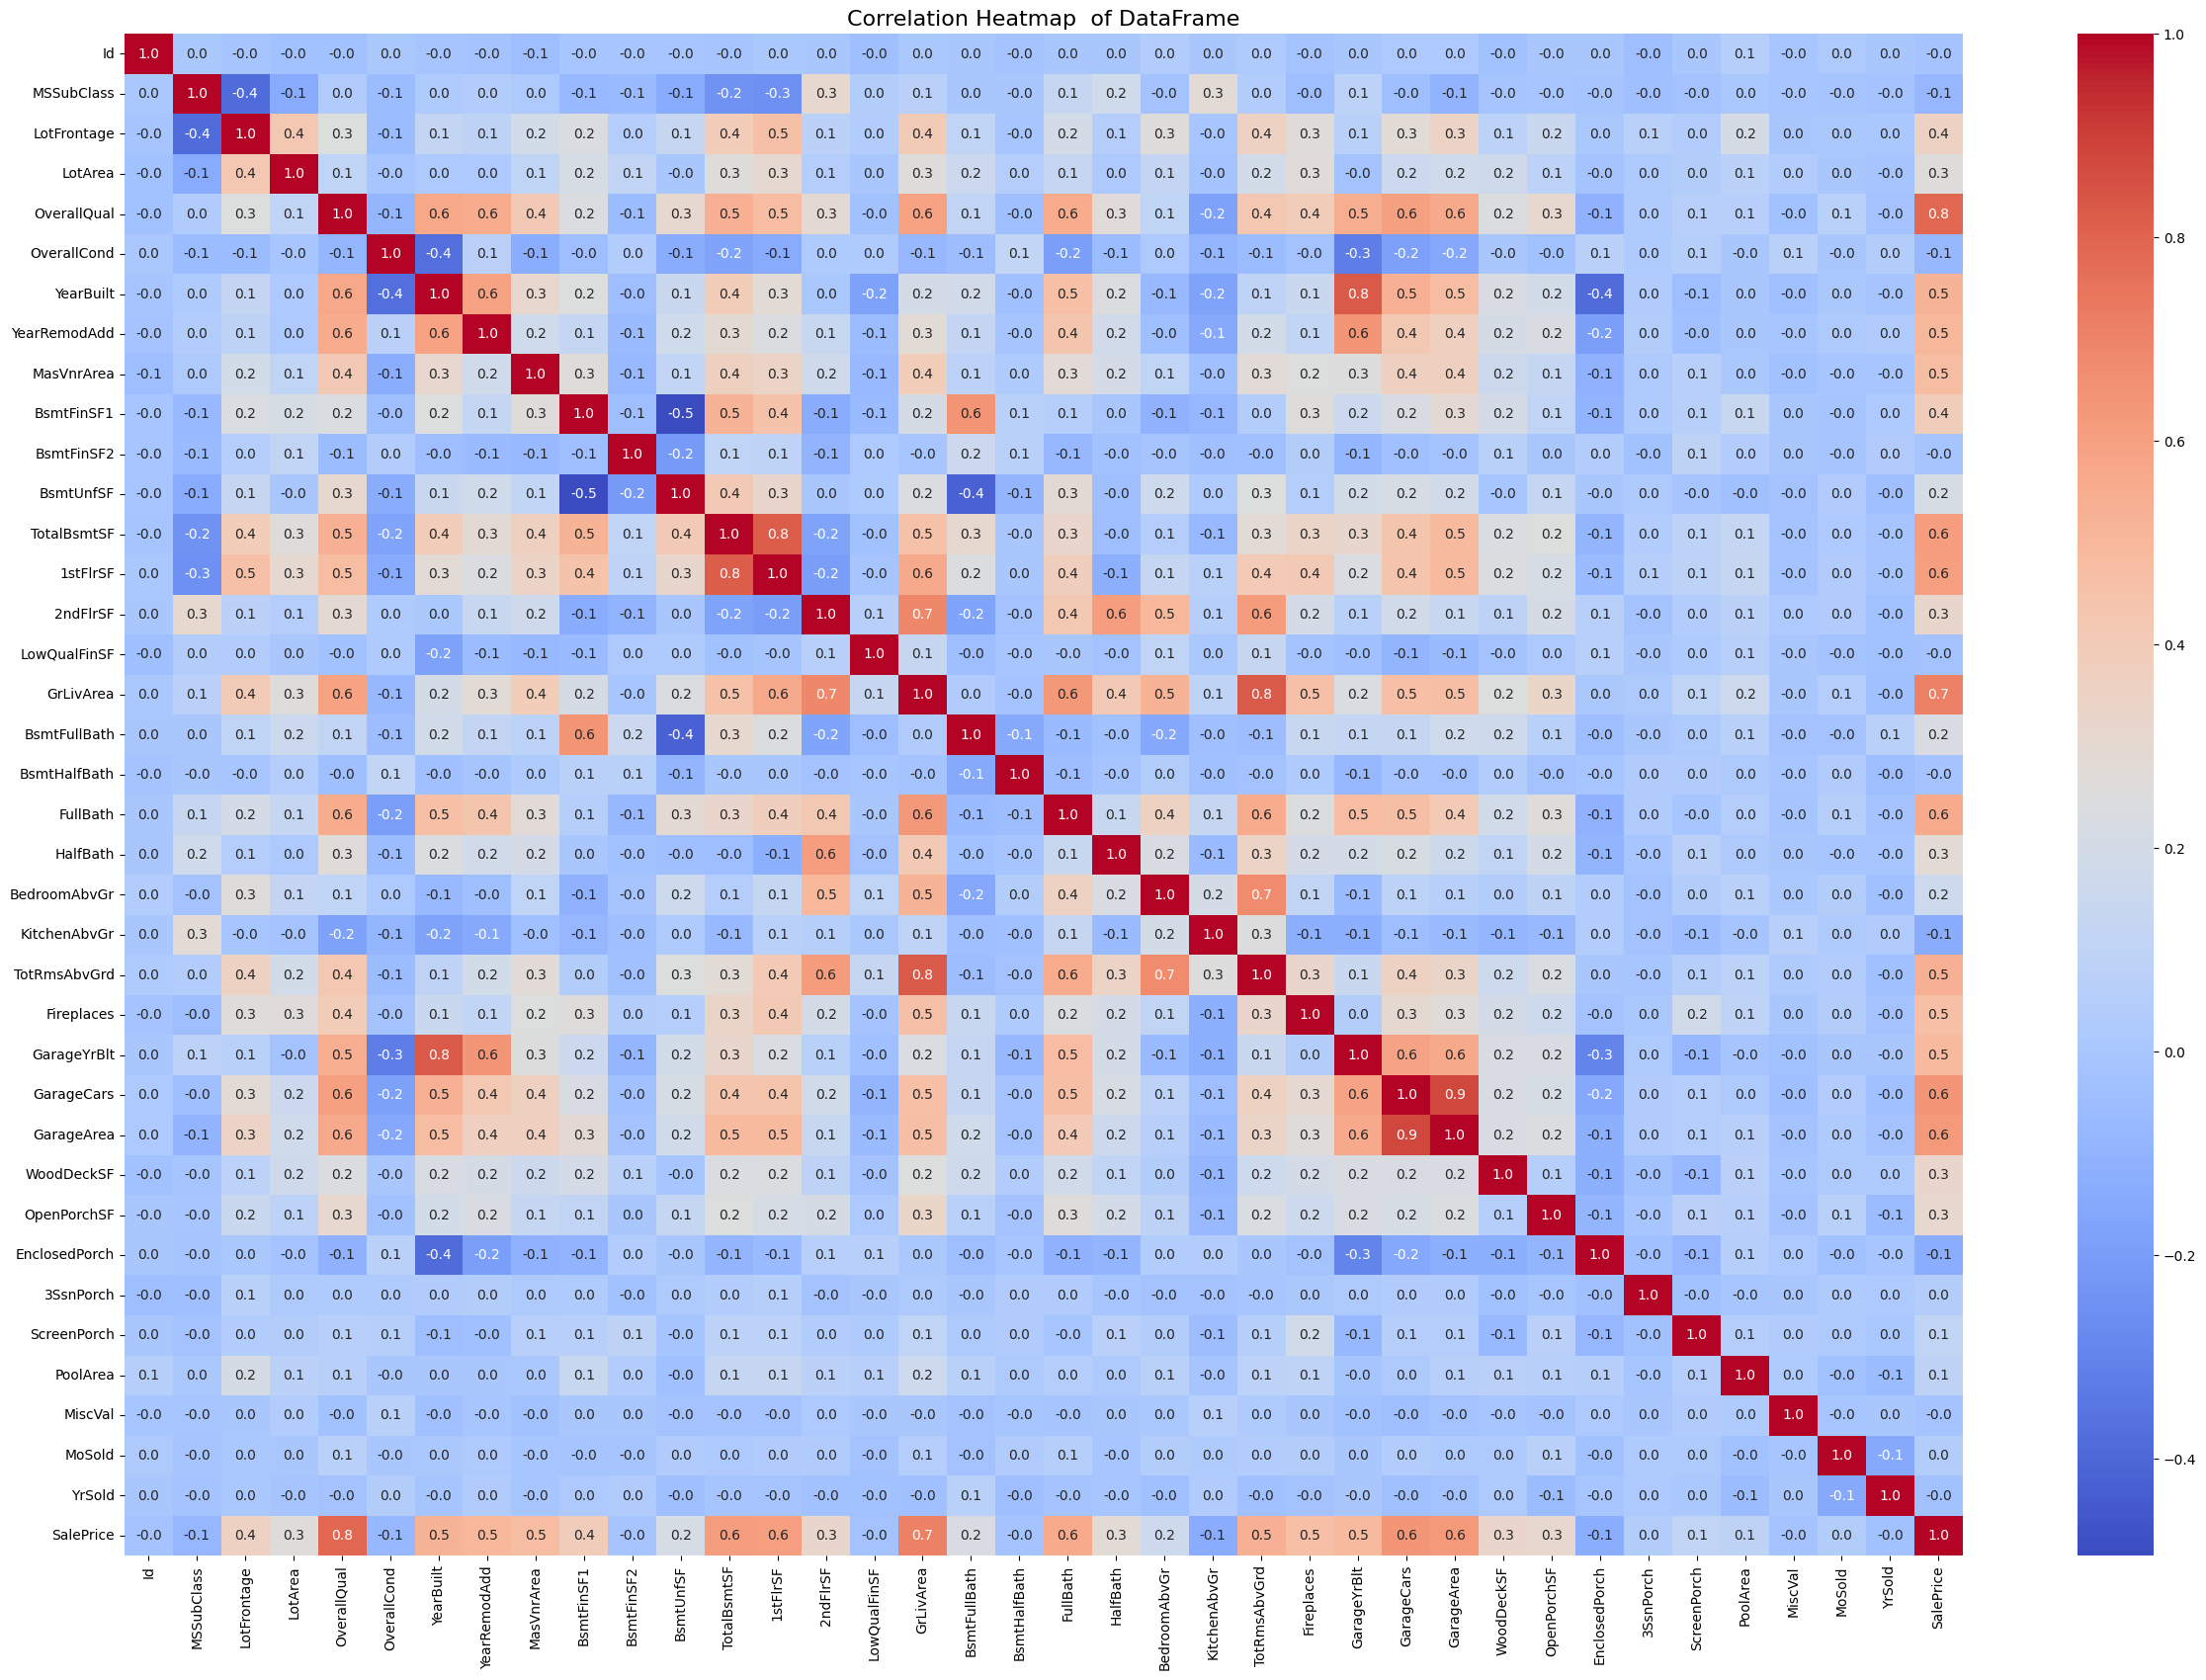

In [ ]:
# Increase figure size
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1f",  cmap='coolwarm')

# Add title and show the plot
plt.title('Correlation Heatmap  of DataFrame', fontsize=16)

# Show the plot
plt.show()

**Comment**

- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)
One feature from each of these pair will be dropped after data visualization.

#**Selection 2.3 Univariate and Bivariate Analysis - Numerical Features**

- **Section 2.3.1: Analyzing Numerical Features with Continuous Values**
- **Section 2.3.2 : Visualizing the distribution of the numeric features**
- **Section 2.3.3 : Analyzing Numerical Features with Discrete Values**
- **Section 2.3.4 : Missing Value Handling - Numerical Features**

#**Section 2.3.1 : Analyzing Numerical Features with Continuous Values**

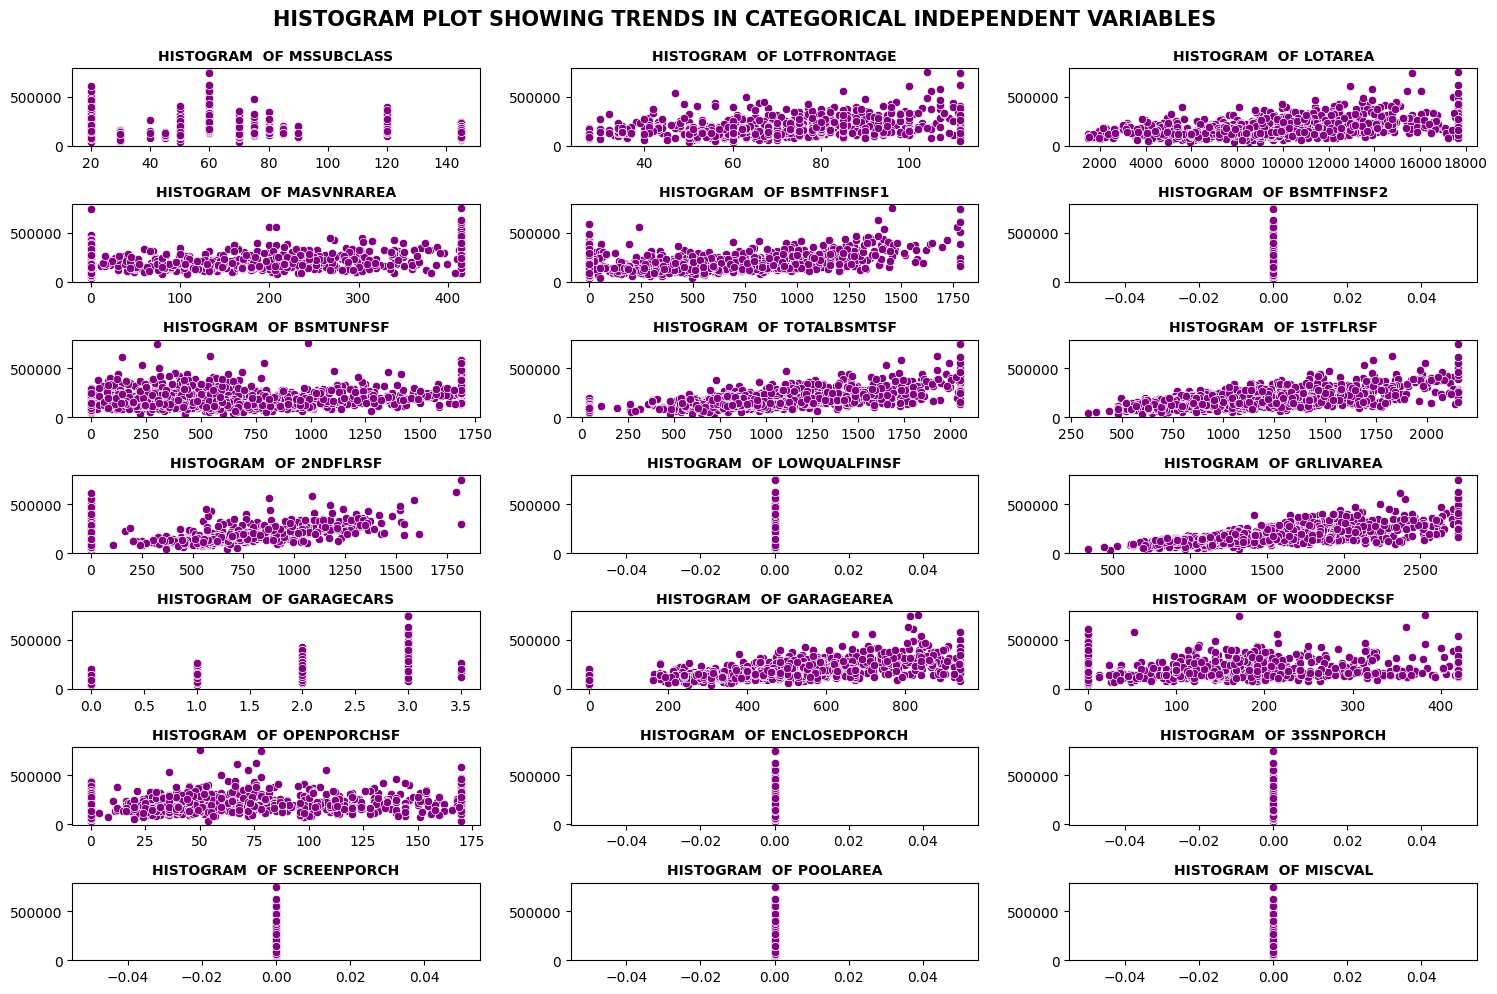

In [ ]:
numerical_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2',
                     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                     'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                     'ScreenPorch', 'PoolArea', 'MiscVal']
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 10))
fig.suptitle('Histogram Plot showing trends in categorical independent variables'.upper(), fontsize=15, fontweight='bold', y=0.99)
for i in range(num_rows):
    for j in range(3):
        idx = i * 3 + j
        if idx < num_columns:
            column_name = numerical_columns[idx]
            sns.scatterplot(data=housing_df, x=numerical_columns[idx], y='SalePrice', ax=ax[i, j], color='purple')
            ax[i, j].set_xlabel('')
            ax[i, j].set_ylabel('')
            ax[i, j].set_title('Histogram  of {}'.format(column_name).upper(), fontsize=10,fontweight='bold')
        else:
            ax[i, j].axis('off')
plt.tight_layout()
plt.show()

**Comment:**

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'BsmtSF2' has single value and can be dropped
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

#**Section 2.3.2 : Visualizing The Distribution Of The Numeric Features**

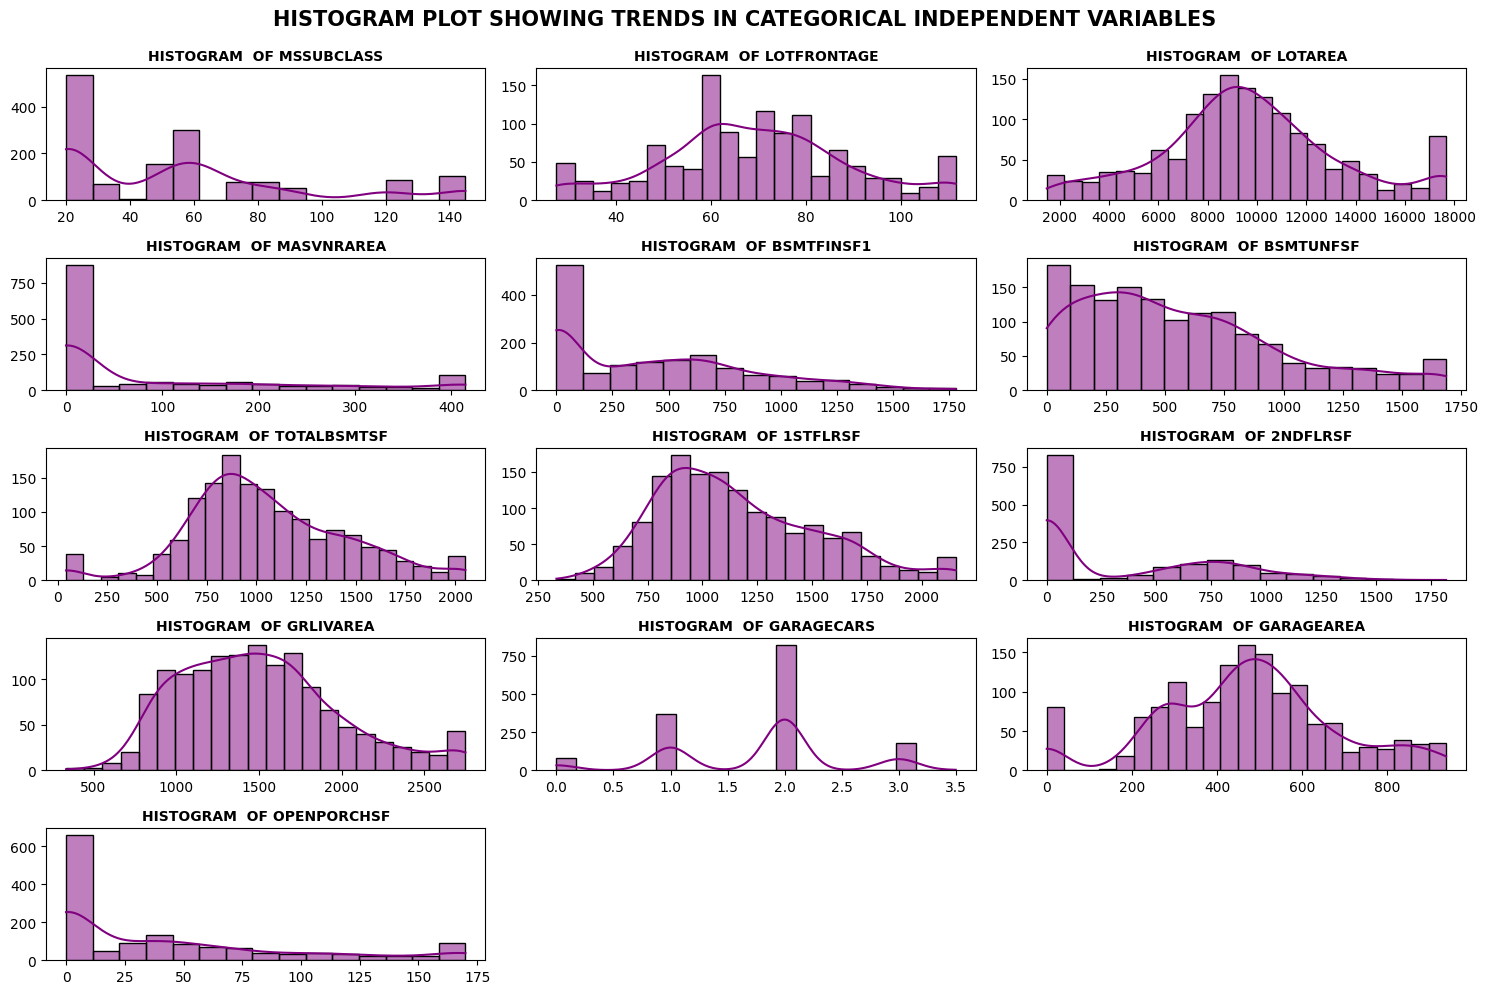

In [ ]:
numerical_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF',
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 10))
fig.suptitle('Histogram Plot showing trends in categorical independent variables'.upper(), fontsize=15, fontweight='bold', y=0.99)
for i in range(num_rows):
    for j in range(3):
        idx = i * 3 + j
        if idx < num_columns:
            column_name = numerical_columns[idx]
            sns.histplot(data=housing_df, x=numerical_columns[idx], ax=ax[i, j], color='purple', kde=True)
            ax[i, j].set_xlabel('')
            ax[i, j].set_ylabel('')
            ax[i, j].set_title('Histogram  of {}'.format(column_name).upper(), fontsize=10,fontweight='bold')
        else:
            ax[i, j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Removing these features having fixed values as they won't contribute in predicting SalePrice
housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

#**Section 2.3.3 : Analyzing Numerical Features with Discrete Values**

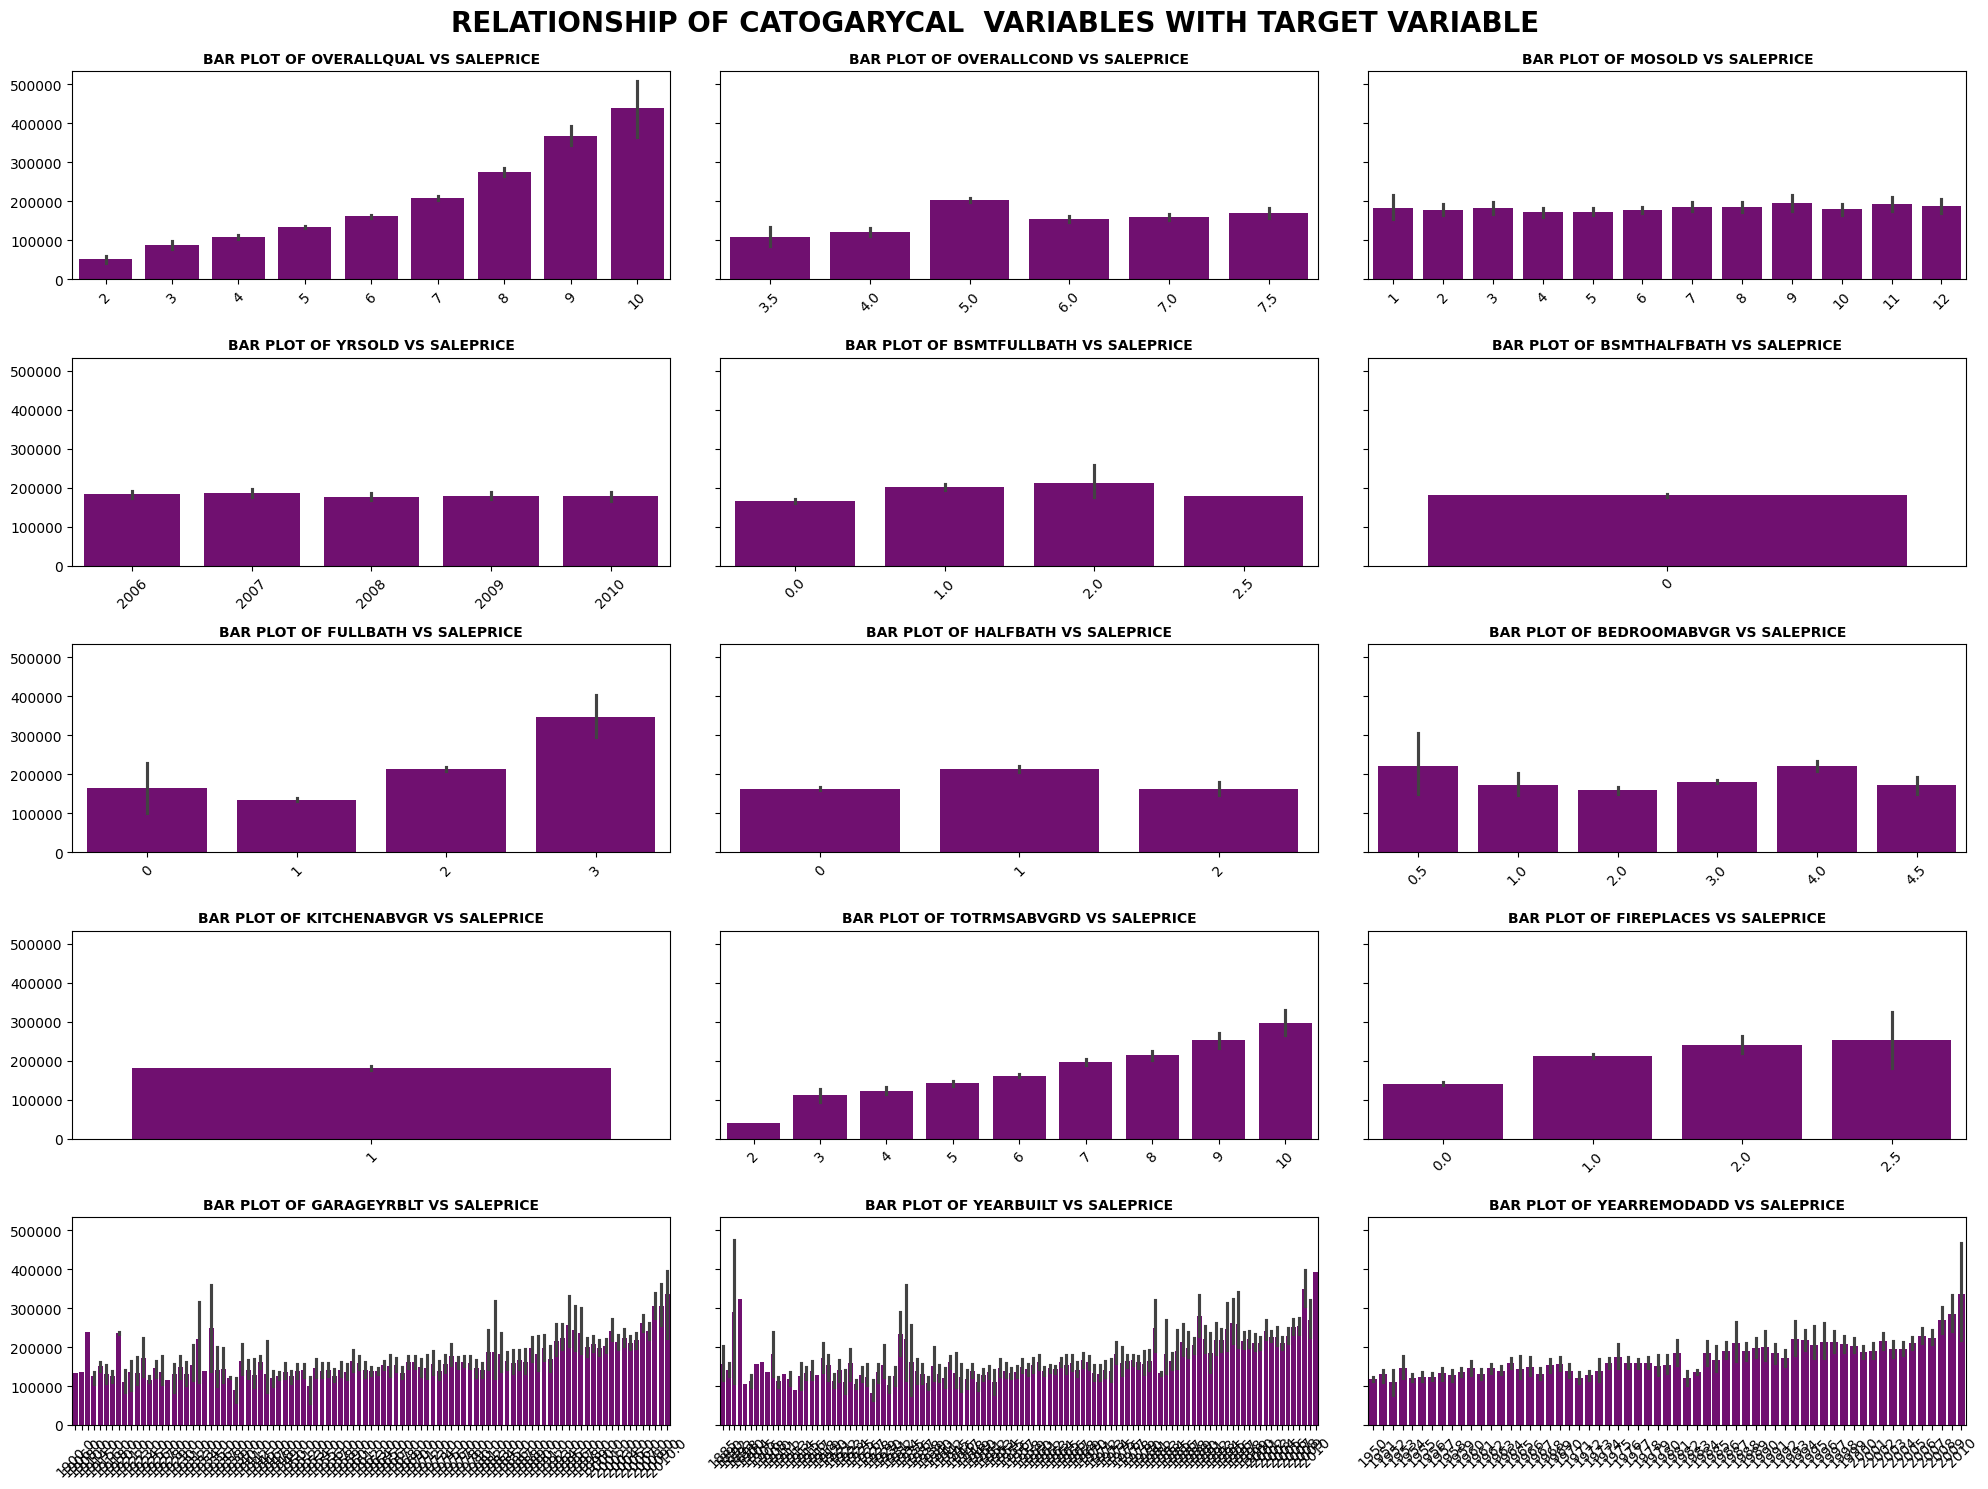

In [ ]:
categorical_columns = ['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3

# Create main title
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, num_rows * 3), sharey=True)
fig.suptitle('Relationship of Catogarycal  Variables with Target Variable'.upper(), fontsize=20, fontweight='bold', y=0.99)

for i in range(num_rows):
    for j in range(3):
        idx = i * 3 + j
        if idx < num_columns:
            column_name = categorical_columns[idx]
            sns.barplot(data=housing_df, x=column_name, y = 'SalePrice', ax=ax[i, j], color='purple')
            ax[i, j].set_title('Bar Plot Of {} Vs SalePrice'.format(column_name).upper(), fontsize=10,fontweight='bold')
            ax[i, j].set_xlabel('')
            ax[i, j].set_ylabel('')
            ax[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
        else:
            ax[i, j].axis('off')

plt.tight_layout()
plt.show()

**Comment:**

- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [ ]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [ ]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

BsmtFullBath
0.0    856
1.0    588
2.0     15
2.5      1
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64


In [ ]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [ ]:

housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [ ]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

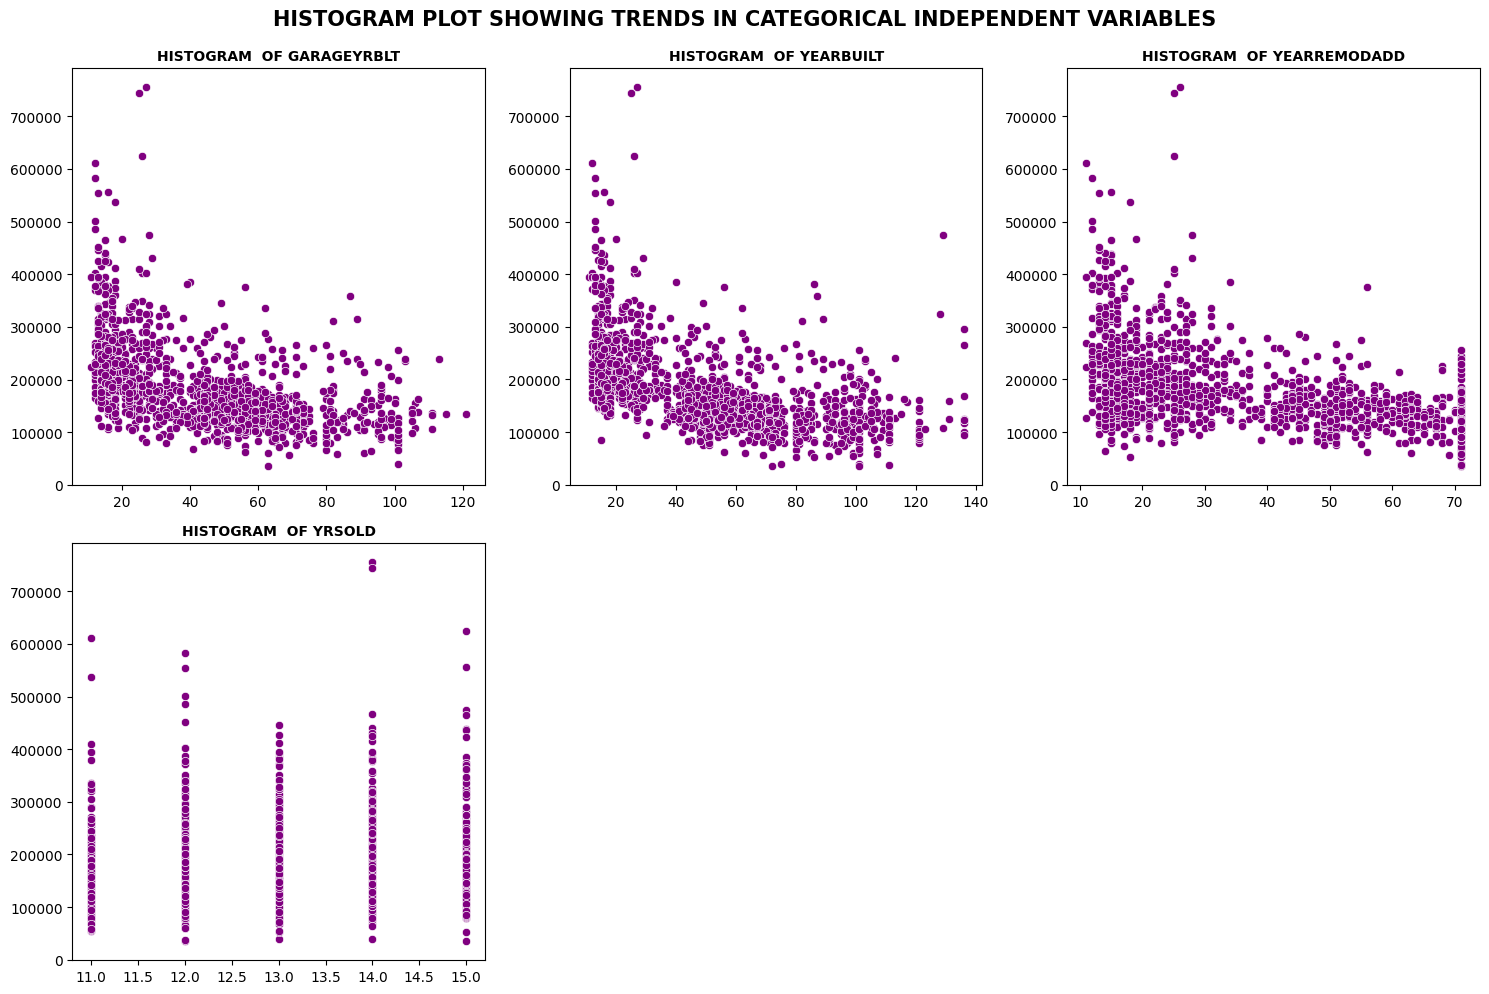

In [ ]:
numerical_columns =['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 10))
fig.suptitle('Histogram Plot showing trends in categorical independent variables'.upper(), fontsize=15, fontweight='bold', y=0.99)
for i in range(num_rows):
    for j in range(3):
        idx = i * 3 + j
        if idx < num_columns:
            column_name = numerical_columns[idx]
            sns.scatterplot(data=housing_df, x=numerical_columns[idx], y='SalePrice', ax=ax[i, j], color='purple')
            ax[i, j].set_xlabel('')
            ax[i, j].set_ylabel('')
            ax[i, j].set_title('Histogram  of {}'.format(column_name).upper(), fontsize=10,fontweight='bold')
        else:
            ax[i, j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

**Comment:**

- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
- YrSold still does not show any significant trend

#**Section 2.3.4 : Missing Value Handling - Numerical Features**

In [ ]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
GarageYrBlt  :  6.0


In [ ]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage

In [ ]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(69,)


#**Section 3 : Analyzing Categorical Features**
- **Section 3.1 : Missing Value Handling - Categorical Features**
- **Section 3.2 : Analyzing Ordered Features**
- **Section 3.3 : Encoding Categorical Features**
- **Section 3.4 : Analyzing Unordered Featues**
- **Secton 3.5 : Encoding Categorical Variables**

In [ ]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#**Section 3.1 : Missing Value Handling - Categorical Features**

In [ ]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [ ]:
housing_df['Electrical'].isnull().sum()

1

In [ ]:
housing_df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

**Comment:**

- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

In [ ]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [ ]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [ ]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [ ]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 59.0


**Encoding For Categorical Variables Ordered Features -- to be label encoded**
- 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
- 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

#**Section 3.2 : Analyzing Ordered Features**

In [ ]:
# Function to generate boxplot for SalePrice against different features given the list of features
def generate_boxplot(feature_list):
    fig = plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace=2.0)
        sns.boxplot(data=housing_df, x=feature, y='SalePrice', color='purple')
        plt.tight_layout()

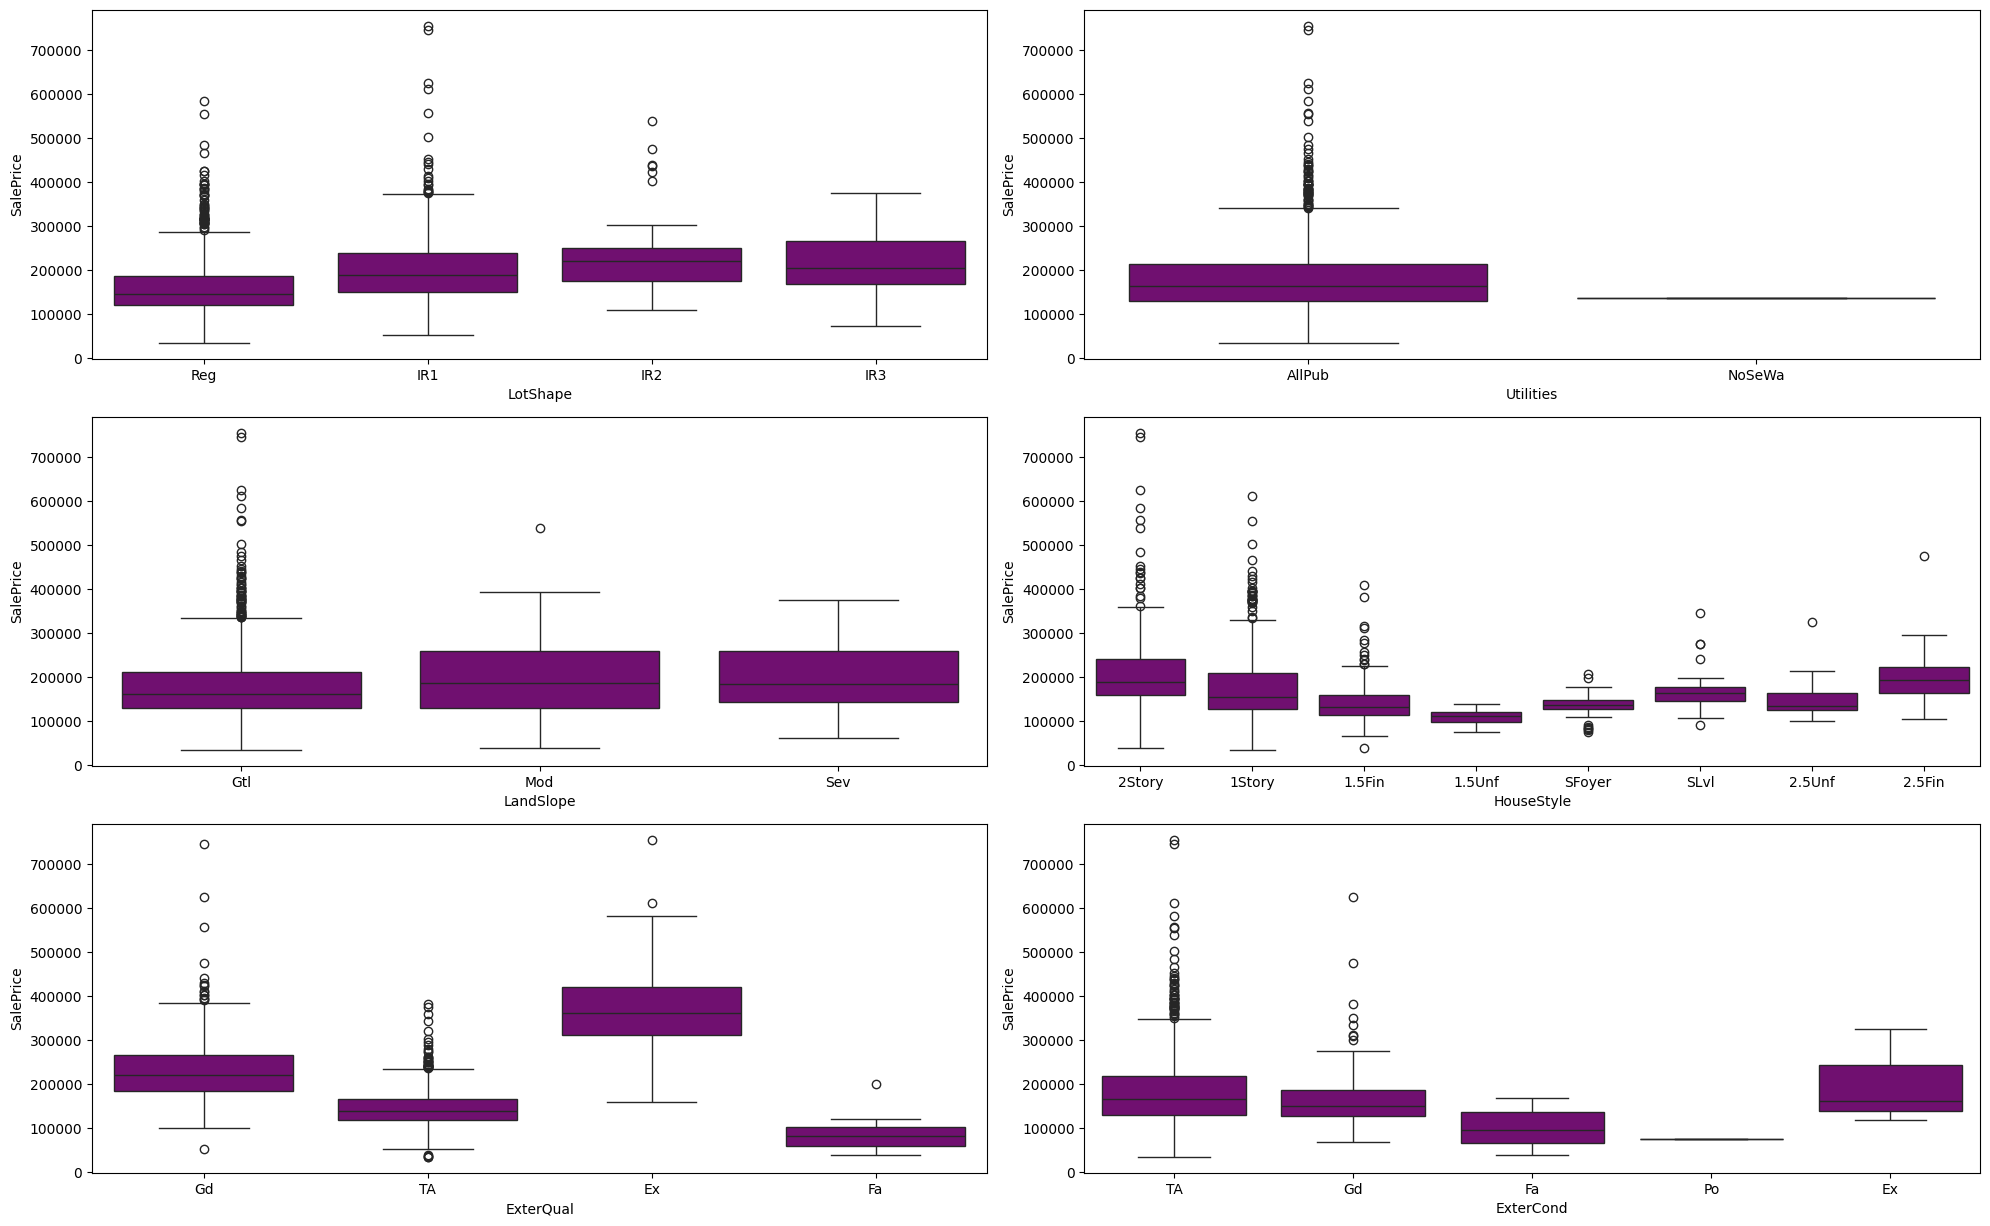

In [ ]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
generate_boxplot(ext_features)

**Comment:**

- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

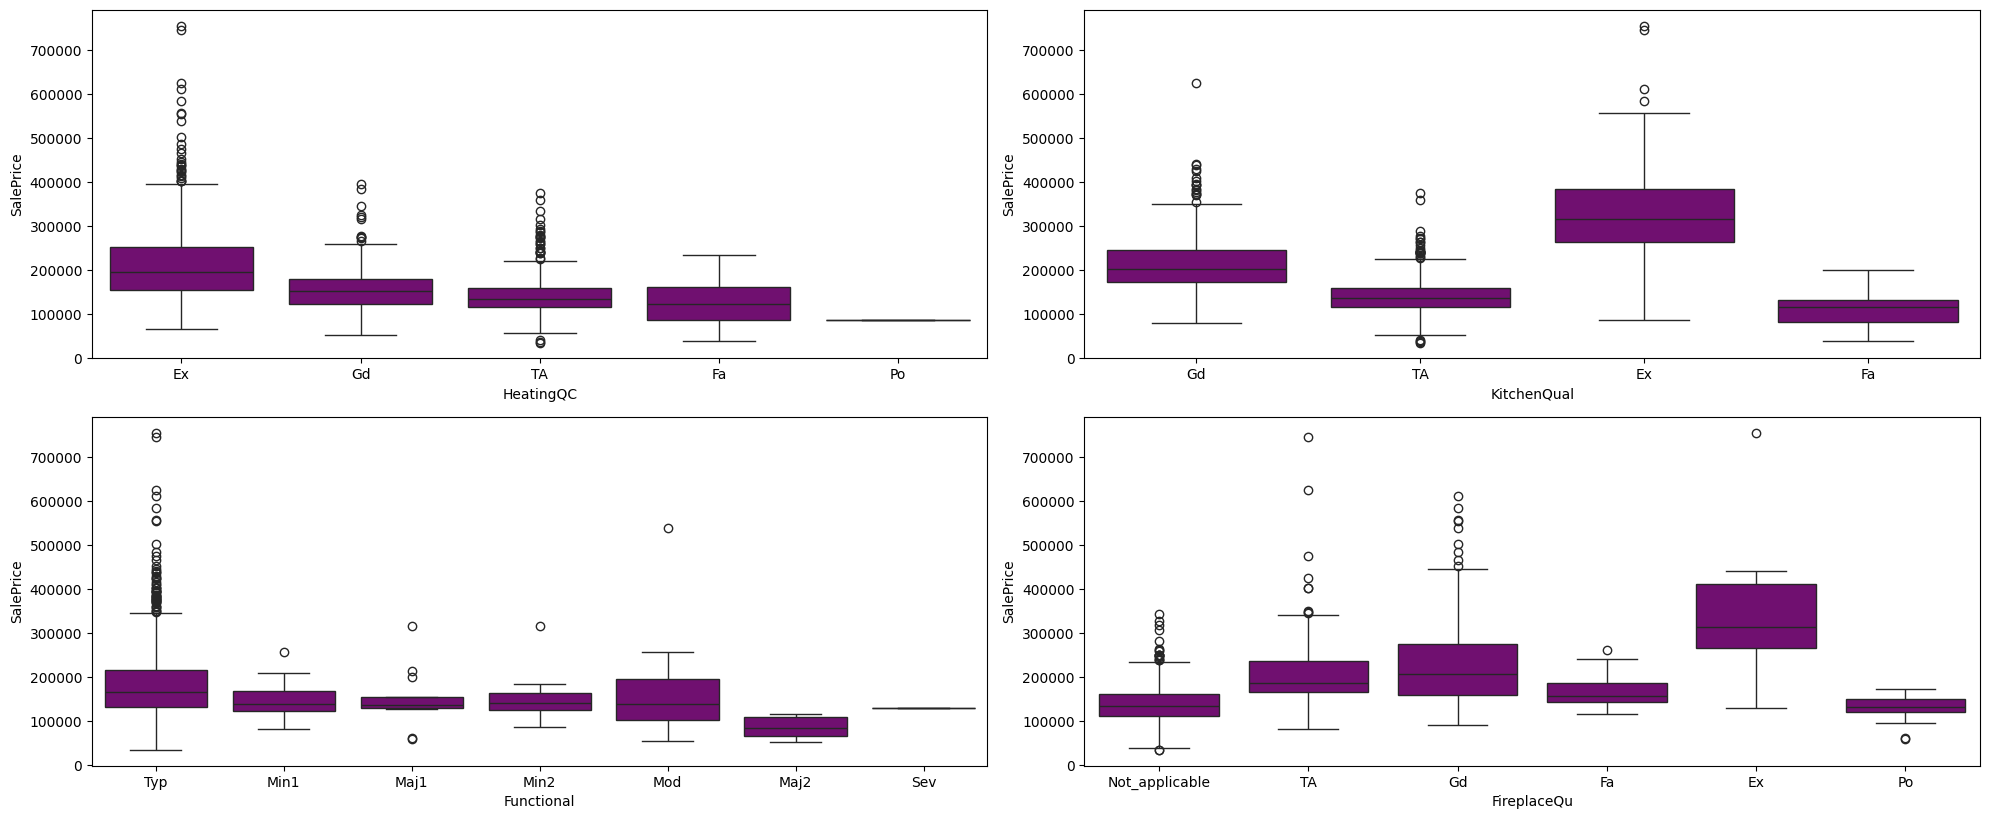

In [ ]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

**Comment:**

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

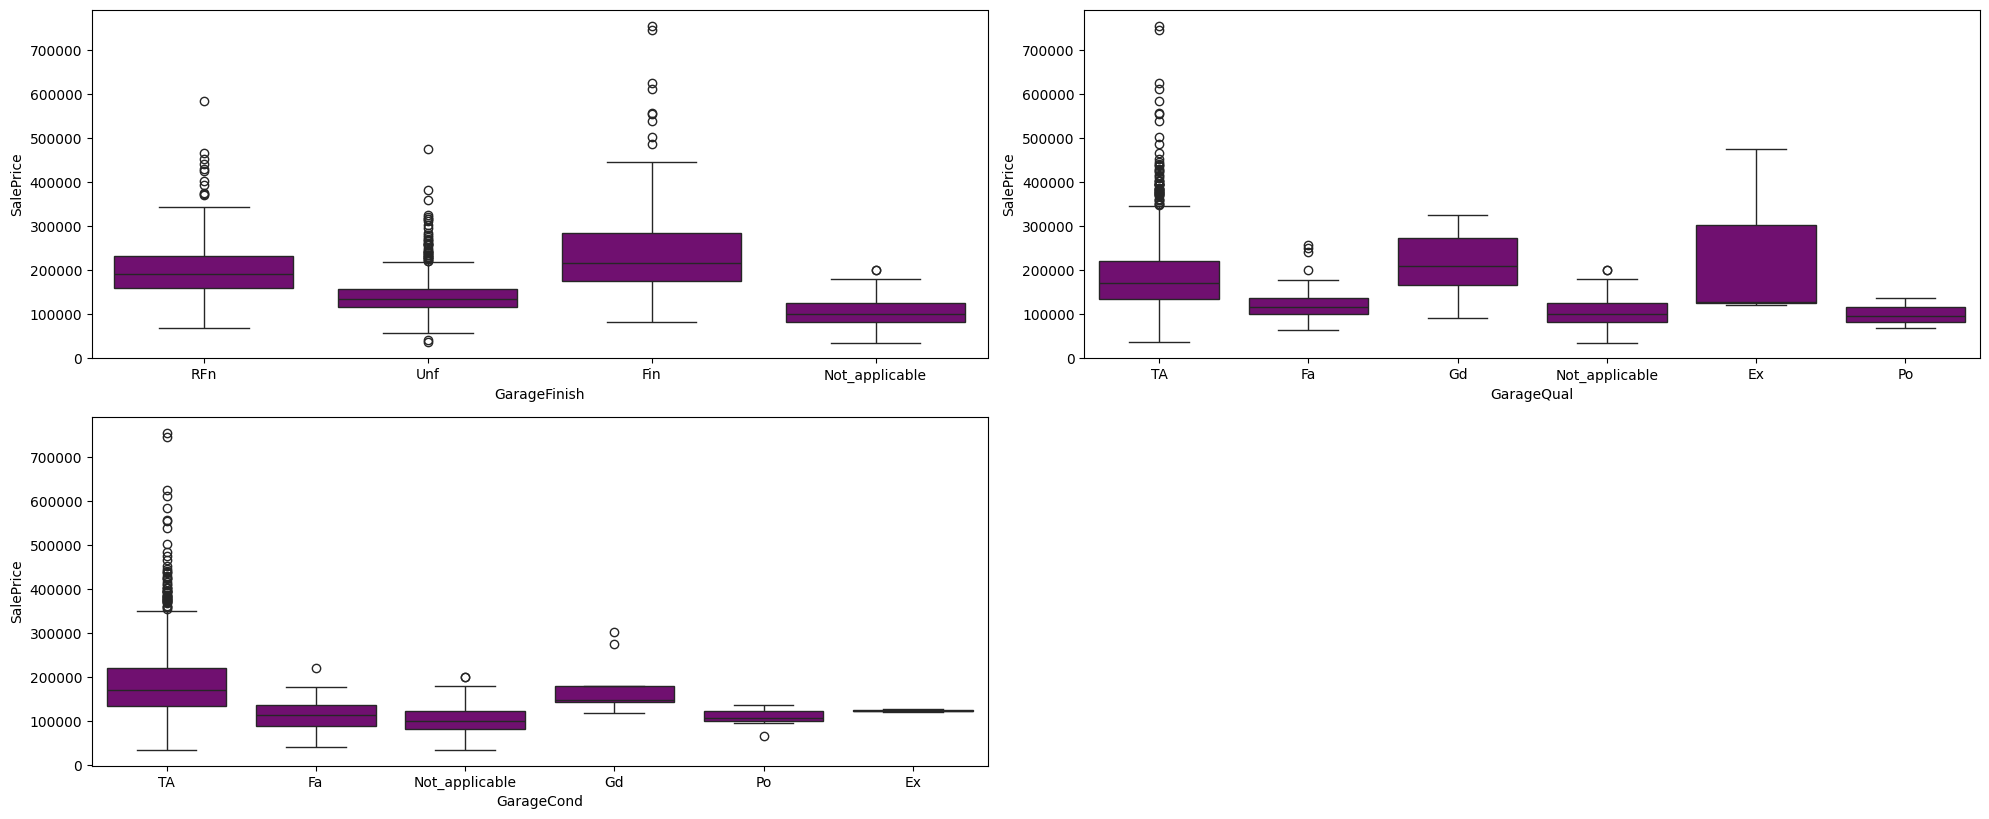

In [ ]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

**Comment:**

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

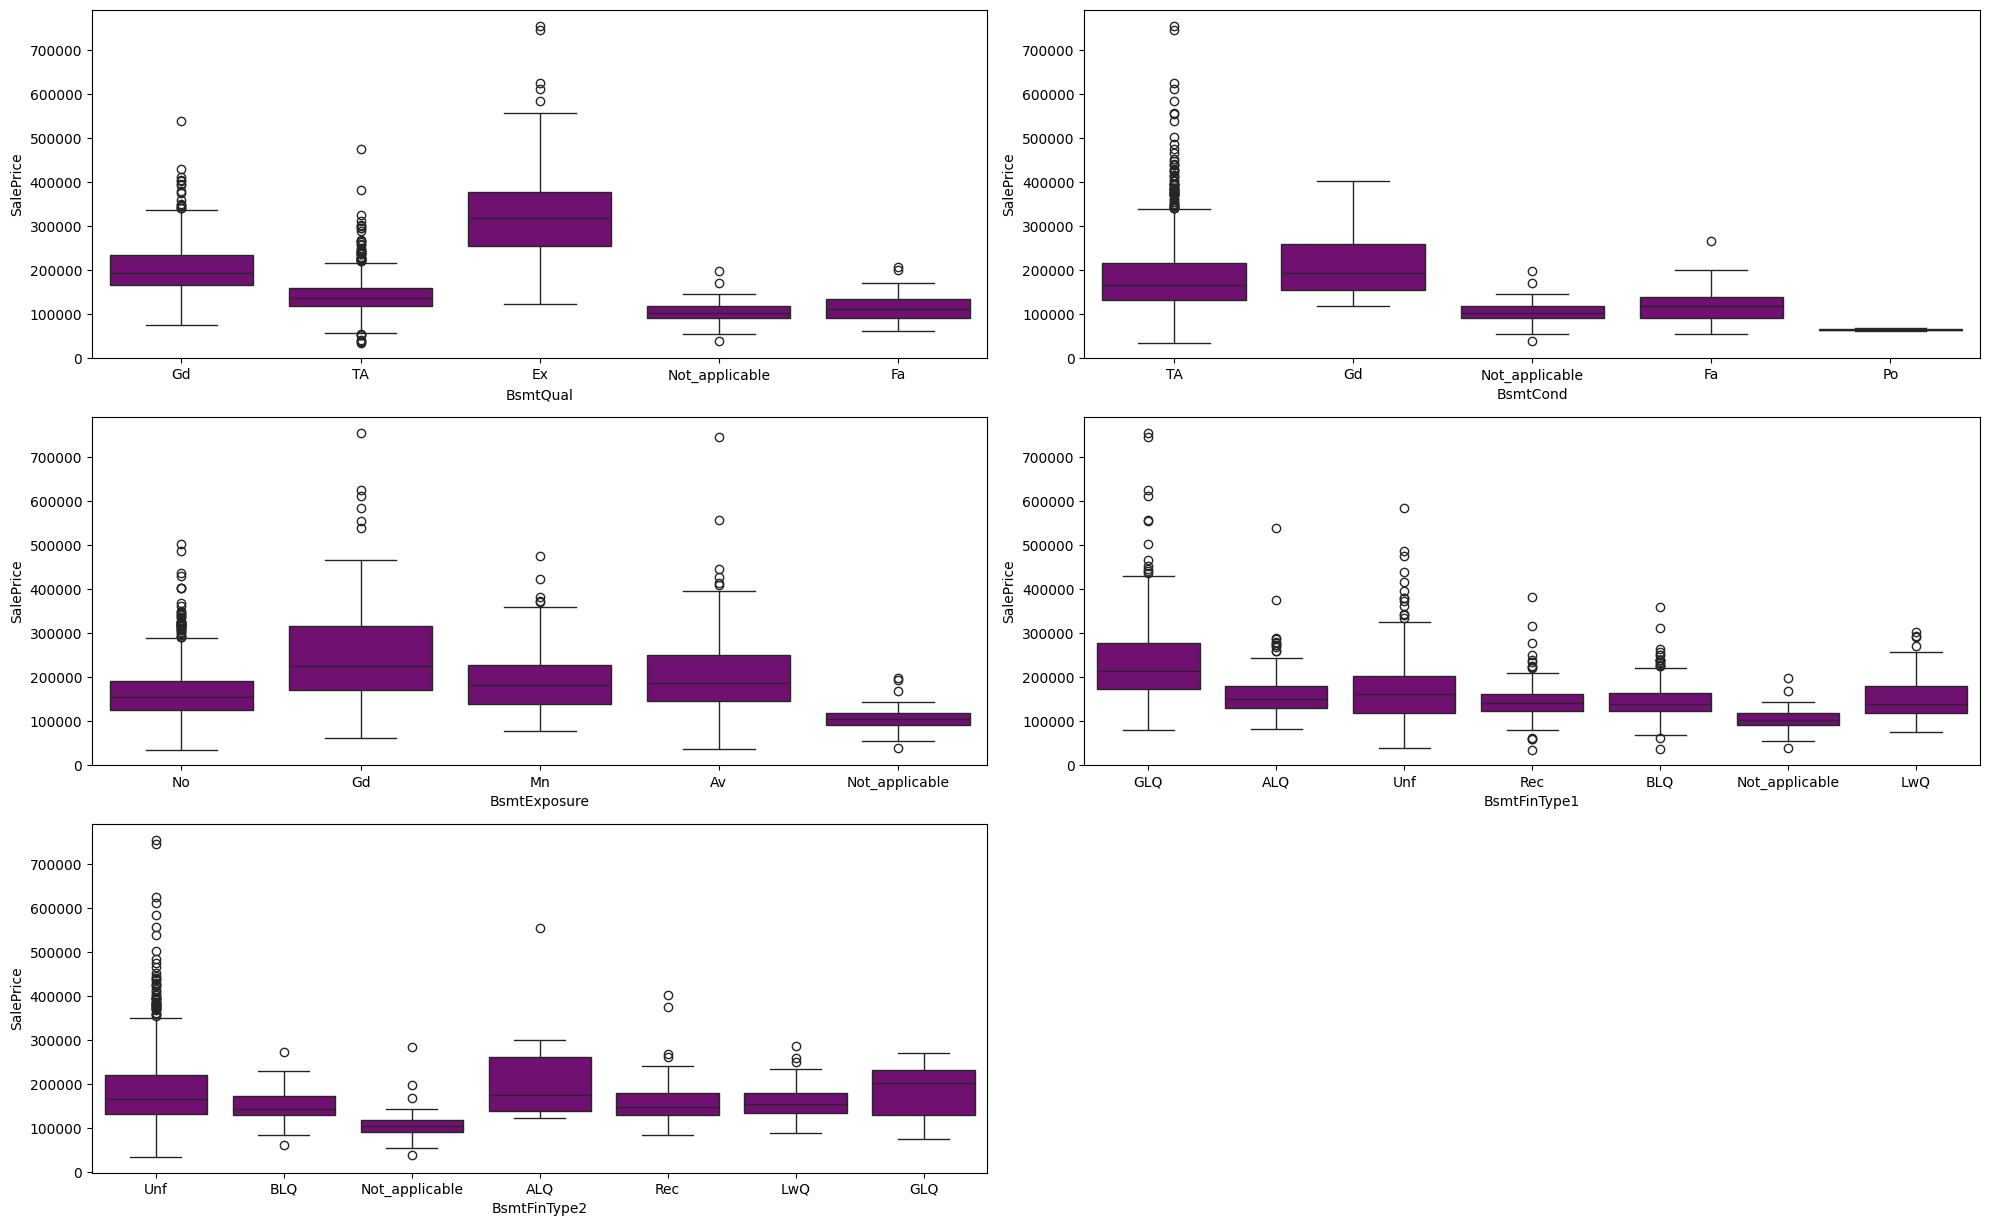

In [ ]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

**Comment:**

- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

#**Section 3.3 : Encoding Categorical Features**

In [ ]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [ ]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


#**Section 3.4 : Analyzing Unordered Featues**

In [ ]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

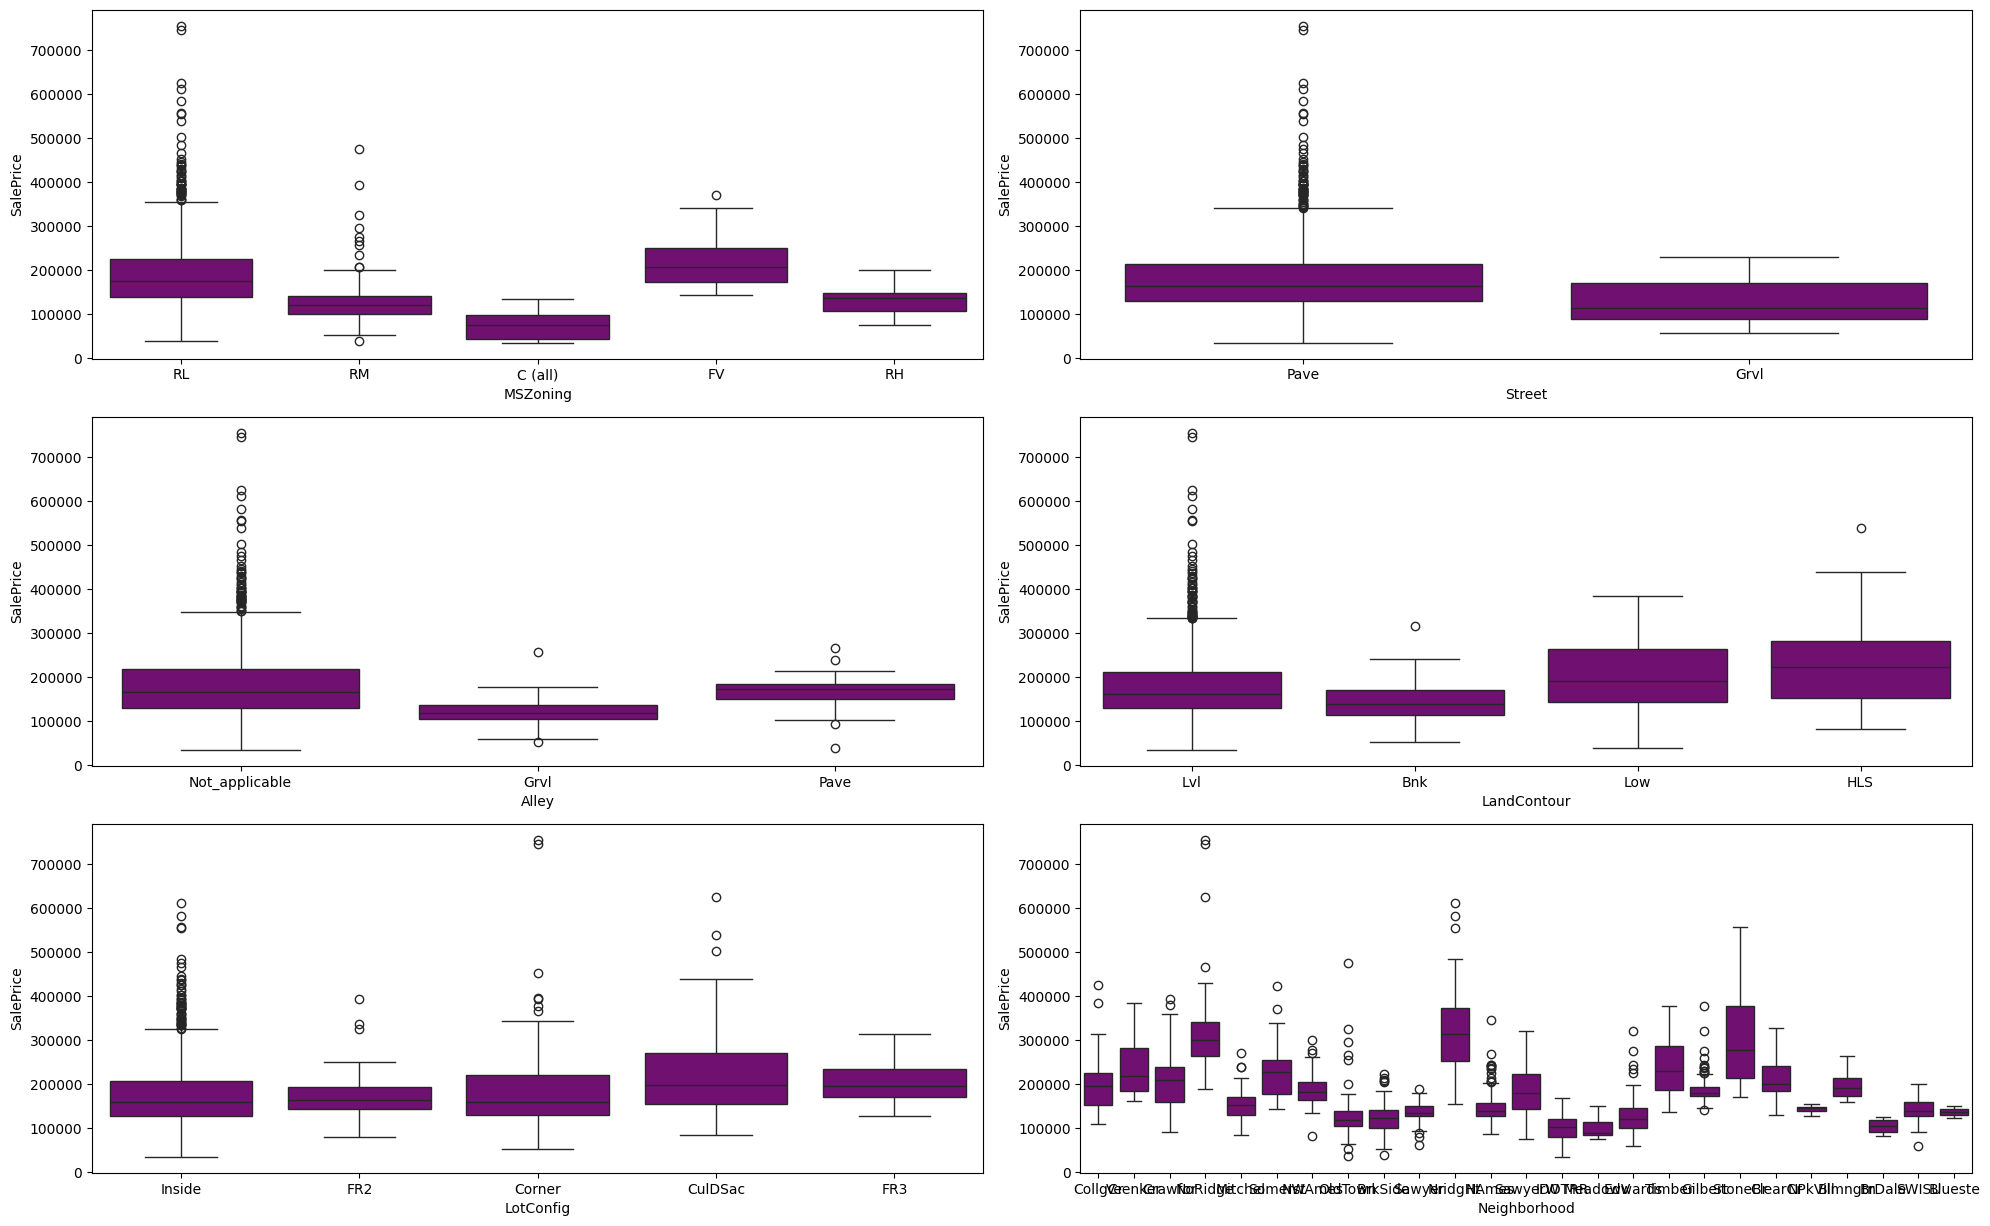

In [ ]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

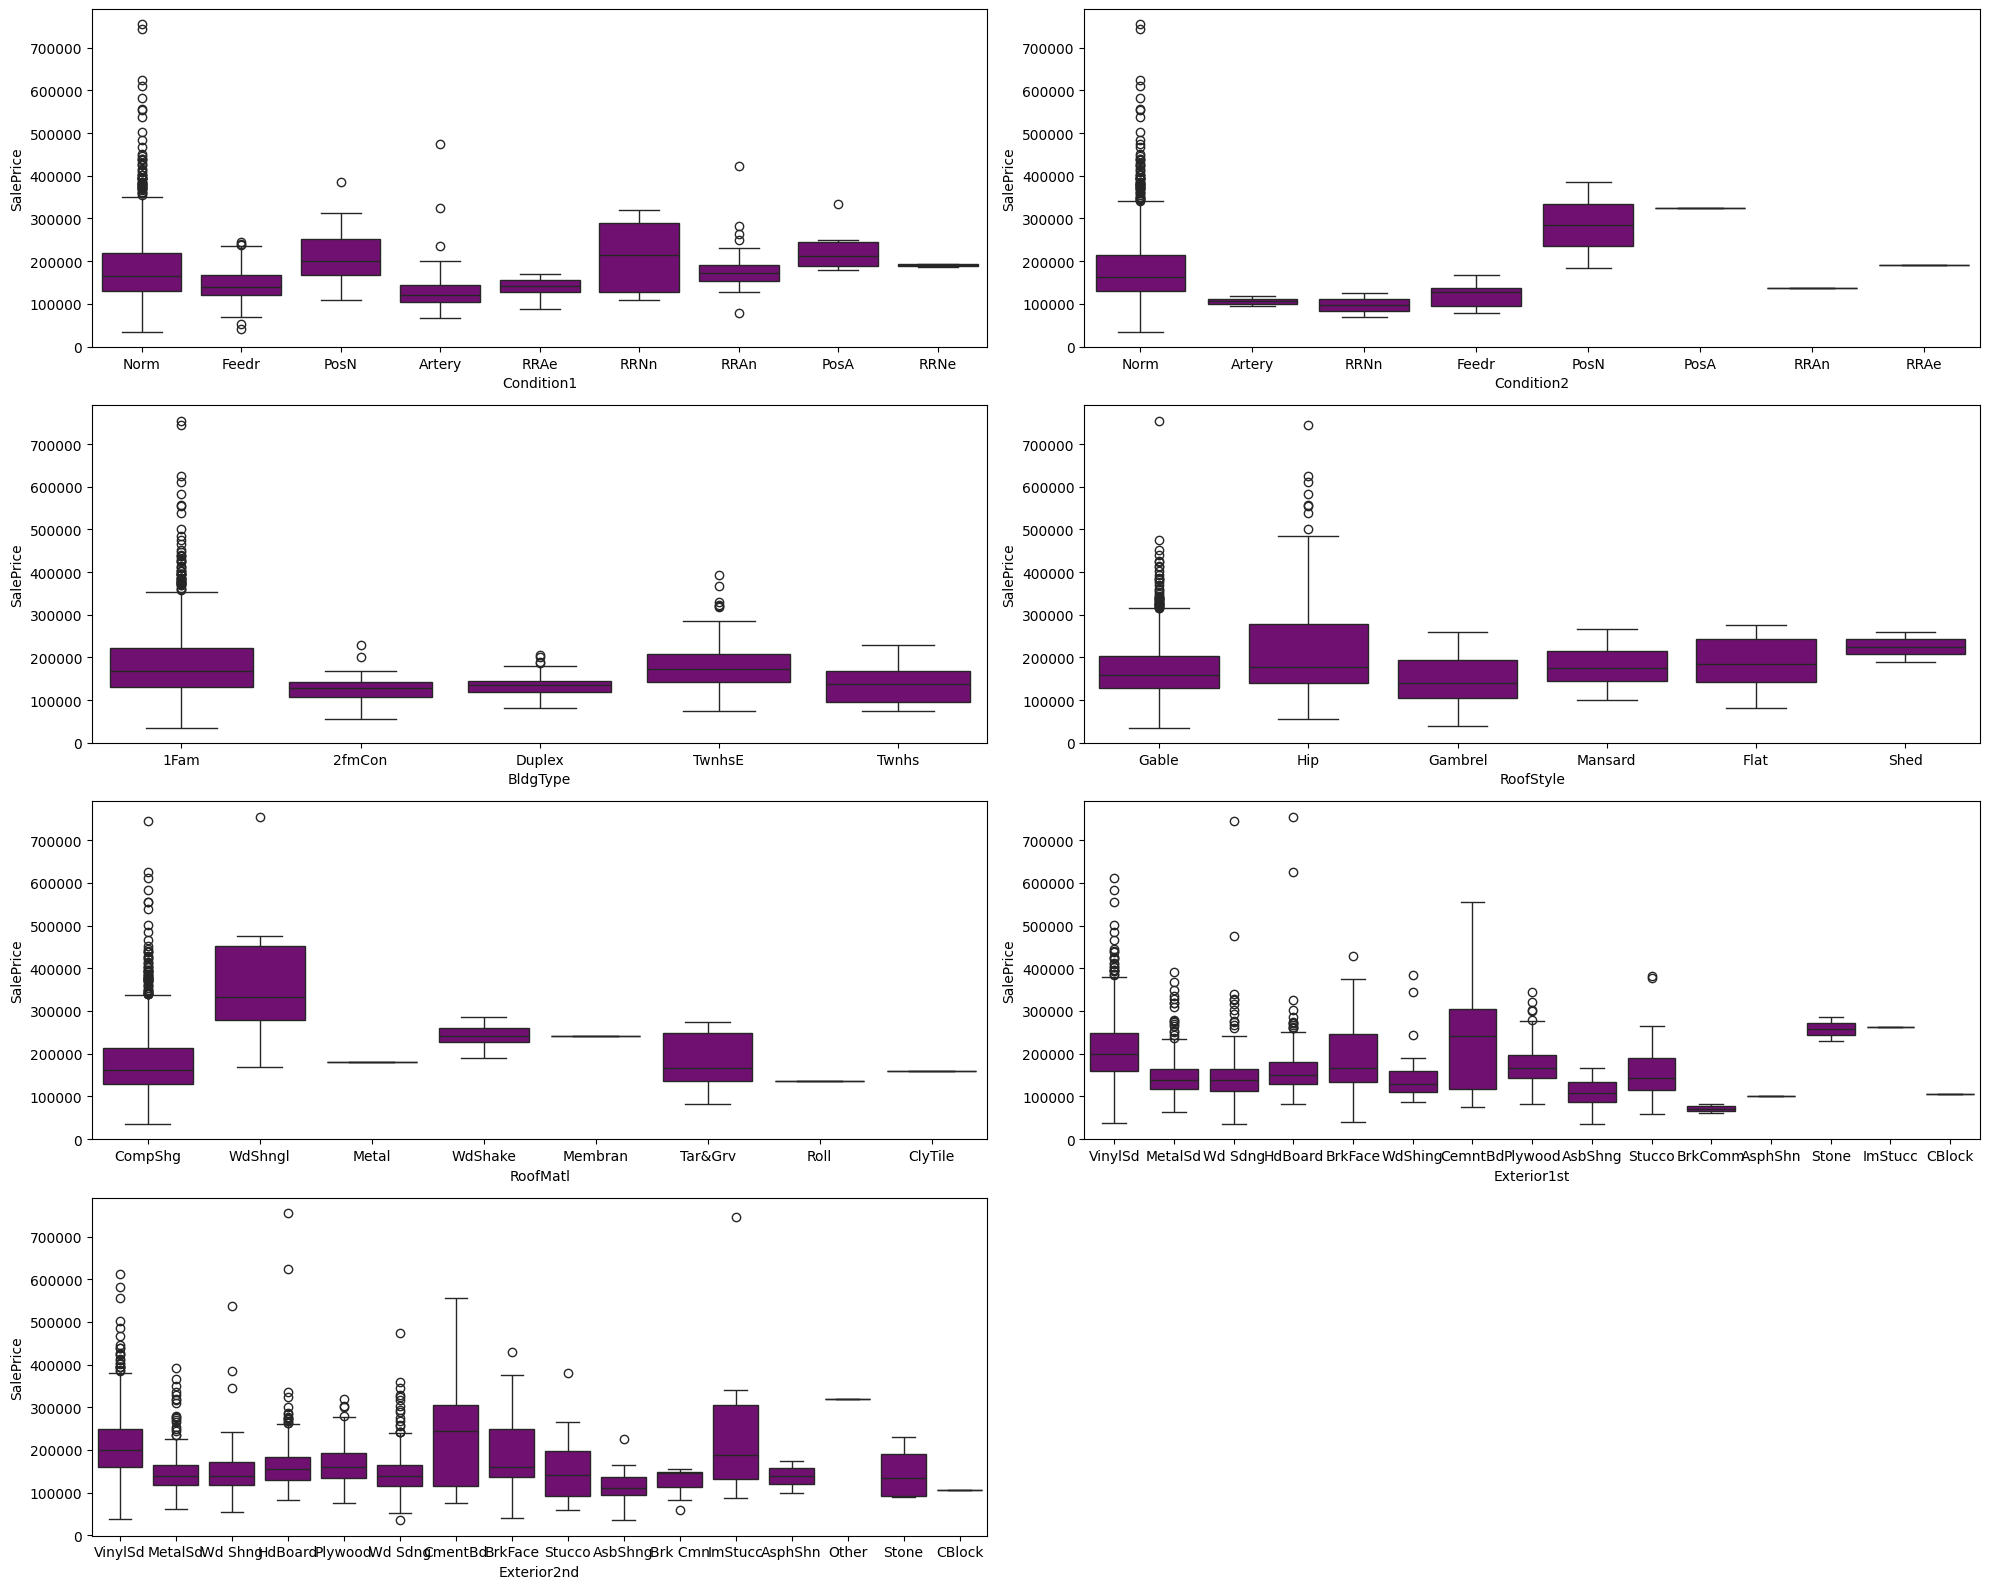

In [ ]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])


**Comment:**

- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

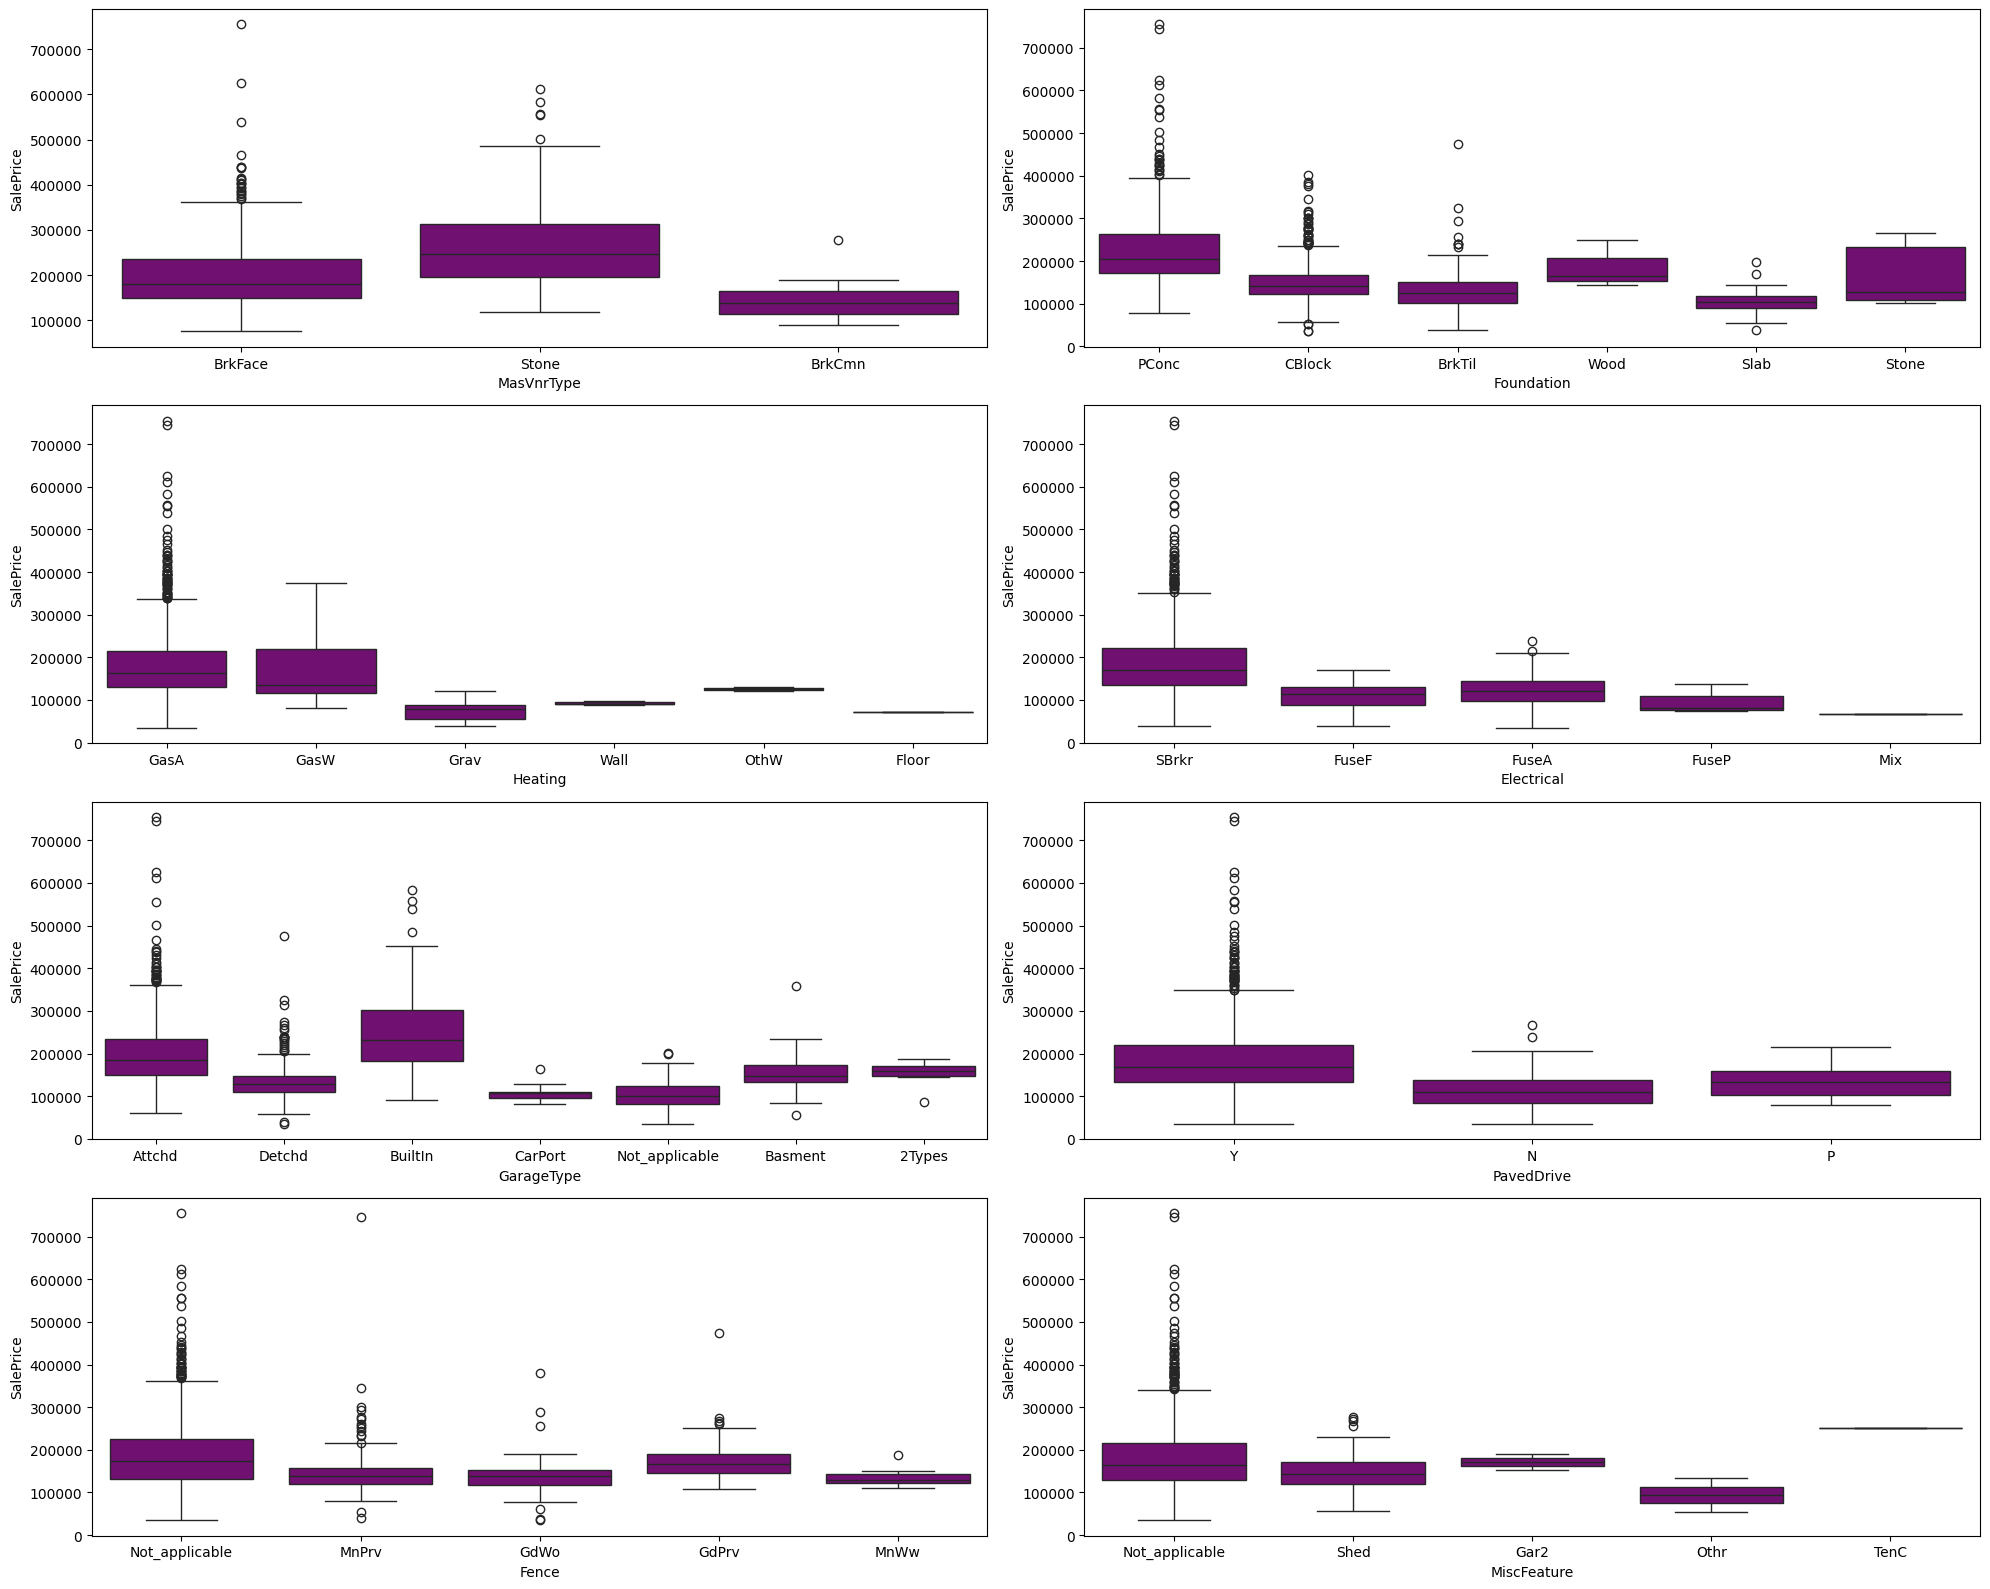

In [ ]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])


**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice

- Most of the houses do not have fence (Fence= Not_applicable)

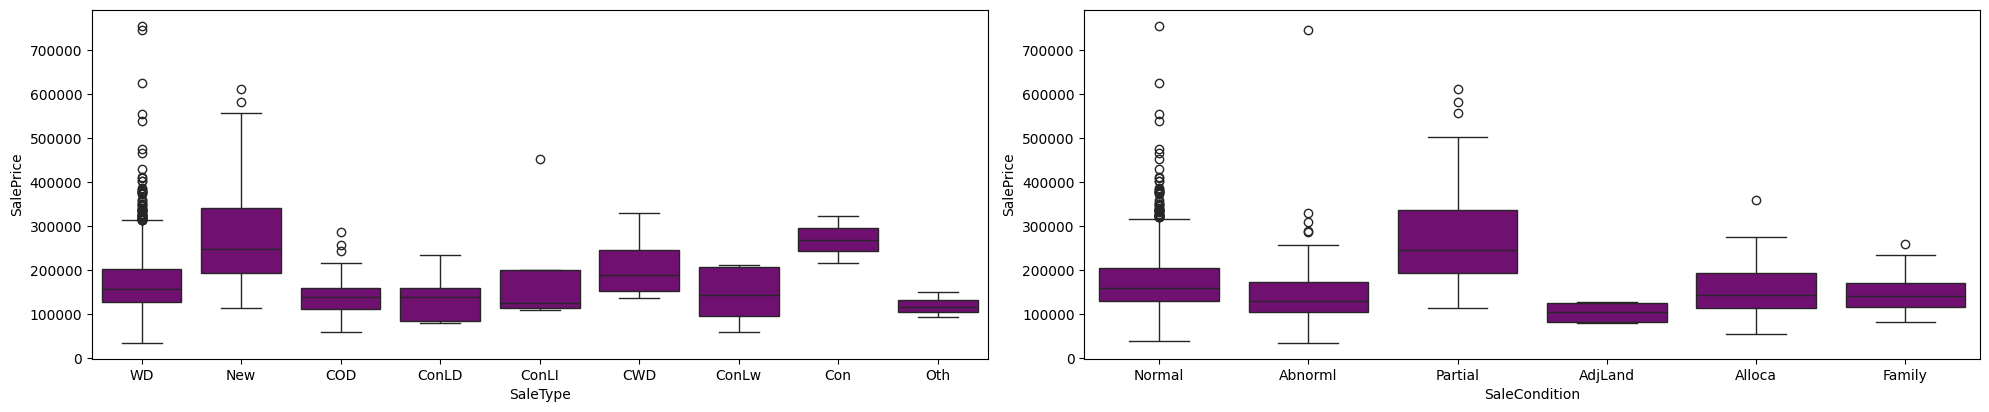

In [ ]:
generate_boxplot(['SaleType','SaleCondition'])

#**Secton 3.5 : Encoding Categorical Variables**

In [ ]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True, dtype='int')

In [ ]:
dummy_df.shape

(1451, 143)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [ ]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)

print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [ ]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 51)


In [ ]:
housing_df.shape

(1451, 68)

In [ ]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [ ]:
housing_df.shape

(1451, 96)

#**Model Traning**
- **Section 4.1 : Splitting into Train and Test Data**
- **Section 4.2 : Create Model pipeline**
- **Section 4.3 : Hyperparameter Tuning**
- **Section 4.4 : Model Evaluation**
- **Section 4.5 : Model Assumption**
- **Section 4.6 : Linear Regression Model**
- **Section 4.7 : Ridge Regression Model**
- **Section 4.8 : Lasso Regression Model**
- **Section 4.9 : Final Model**
- **Section 4.10 : Summary**


In [ ]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,1,0,1,1,0,1,1,0


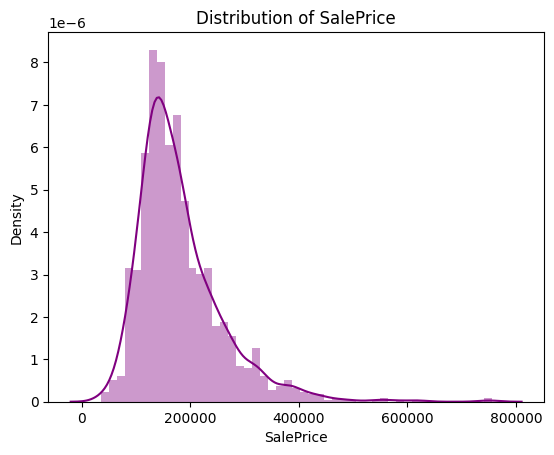

In [ ]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'], color='purple')
plt.show()

**Comment:**
- Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

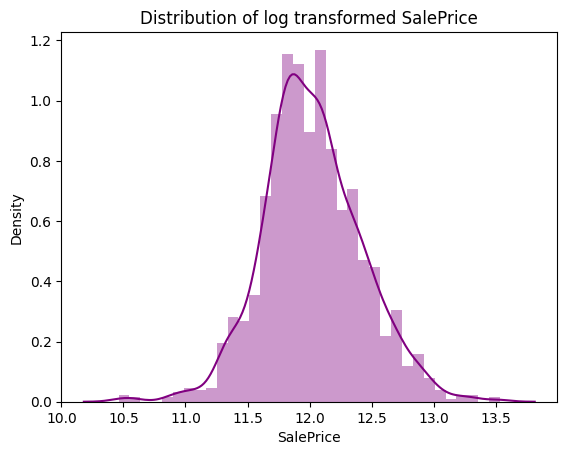

In [ ]:
sns.distplot(np.log(housing_df['SalePrice']), color='purple')
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [ ]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64

#**Section 4.1 : Splitting into Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 95)
(291, 95)
(1160,)
(291,)


In [ ]:
'''# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])'''

"# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.\n\nsi = SimpleImputer(missing_values=np.nan, strategy='mean')\nsi.fit(X_train[['LotFrontage']])\nX_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])\nX_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])"

#**Section 4.2 : Create Model pipeline**

In [ ]:
def model_pipeline(model):
  pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),  # Impute missing values with mean
        ('scaler', MinMaxScaler()),  # Scale the features
        ('poly', PolynomialFeatures(degree=1)),
        ('regressor', model)  # Model to be used
    ])
  return pipeline


#**Section 4.3 : Hyperparameter Tuning**

In [ ]:
def hyperparameter_tuning(pipeline, param_grid, X_train, y_train, X_test, y_test):

    # Define KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=100)

    # Perform GridSearchCV with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Evaluate the best model on the test data
    score = grid_search.score(X_test, y_test)
    print("Best R^2 Score:", grid_search.best_score_)
    print("Test R^2 Score:", score)
    print("Best Parameters:", grid_search.best_params_)

    return grid_search, score



#**Section 4.4 : Model Evaluation**


In [ ]:
def model_evaluation(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    print("R^2 score:", r2)

    # Compute MSE
    mse = mean_squared_error(y_true, y_pred)
    print("Mean Squared Error (MSE):", mse)

    # Compute RMSE
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)

#**Section 4.5 : Model Assumption**

In [ ]:
def assumption_plots(y_test, y_pred):
    plt.figure(figsize=(18, 6))
    residuals = y_test - y_pred

    # Linearity Plot
    plt.subplot(2, 3, 1)
    plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
    line_coords = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Linearity - Actual vs. Predicted'.upper(), fontsize=10, fontweight='bold')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Normality of the Error Terms
    plt.subplot(2, 3, 2)
    sns.distplot(residuals, kde=True, color='purple')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Normality - Distribution of Residuals'.upper(), fontsize=10, fontweight='bold')

    # Q-Q Plot
    plt.subplot(2, 3, 3)
    stats.probplot(residuals, plot=plt)
    plt.title('Normality - Q-Q Plot'.upper(), fontsize=10, fontweight='bold')

    # Homoscedasticity
    plt.subplot(2, 3, 4)
    plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Homoscedasticity - Residuals vs. Predicted Values'.upper(), fontsize=10, fontweight='bold' )

    from statsmodels.graphics.tsaplots import plot_acf
    # Autocorrelation of Residuals
    plt.subplot(2, 3, 5)
    plt.plot(residuals)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation of Residuals'.upper(), fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


#**Section 4.6 : Linear Regression Model**

Best R^2 Score: 0.8919740691462008
Test R^2 Score: 0.8914404250647157
Best Parameters: {'regressor__fit_intercept': False}
**************************************************
R^2 score: 0.8914404250647157
Mean Squared Error (MSE): 0.01723932838812106
Root Mean Squared Error (RMSE): 0.1312986229483046


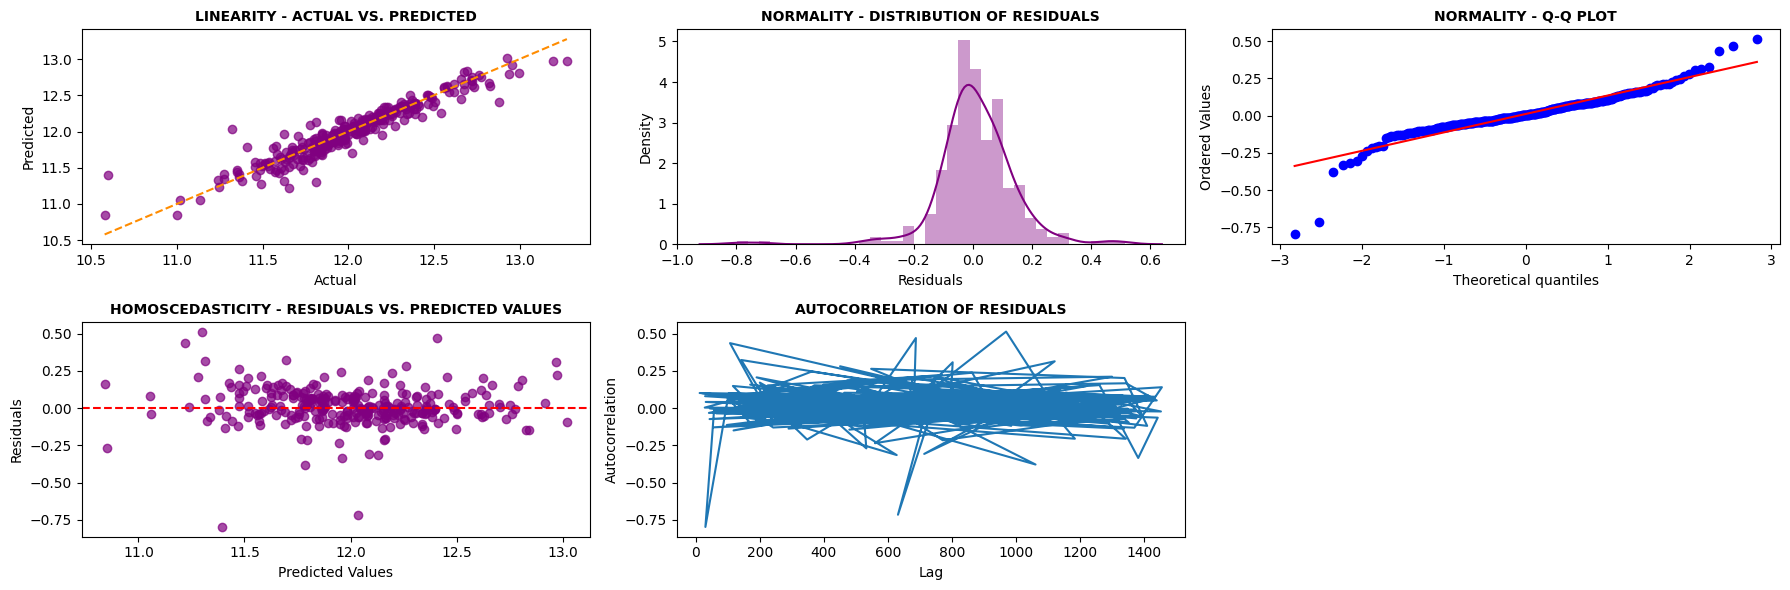

In [ ]:
# Hyperparameter tuning for Linear Regression
pipeline = model_pipeline(LinearRegression())
param_grid_linear = {'regressor__fit_intercept': [True, False]}
grid_search, score = hyperparameter_tuning(pipeline, param_grid_linear, X_train, y_train, X_test, y_test)

print('*' * 50)

# Build Linear regression model with the best parameters found during hyperparameter tuning
pipeline_linear = model_pipeline(LinearRegression(fit_intercept=grid_search.best_params_['regressor__fit_intercept']))
pipeline_linear.fit(X_train, y_train)
y_pred_linear = pipeline_linear.predict(X_test)

# Evaluate the Linear regression model
model_evaluation(y_test, y_pred_linear)

# Visualize assumptions for Linear regression
assumption_plots(y_test, y_pred_linear)


#**Comment:**

**Hyperparameter Tuning**

- Best R^2 Score: 0.8919740691462008
- Test R^2 Score: 0.8914404250647157
- Best Parameters: {'regressor__fit_intercept': False}

**Model Evaluation**

- R^2 score: 0.8900403100143678
- Mean Squared Error (MSE): 0.017461667533686873
- Root Mean Squared Error (RMSE): 0.1321426030229724

#**Section 4.7 : Ridge Regression Model**

Best R^2 Score: 0.8949940451276565
Test R^2 Score: 0.894838234900245
Best Parameters: {'regressor__alpha': 1.4849682622544635}
**************************************************
R^2 score: 0.894838234900245
Mean Squared Error (MSE): 0.016699754061397714
Root Mean Squared Error (RMSE): 0.12922752826467632


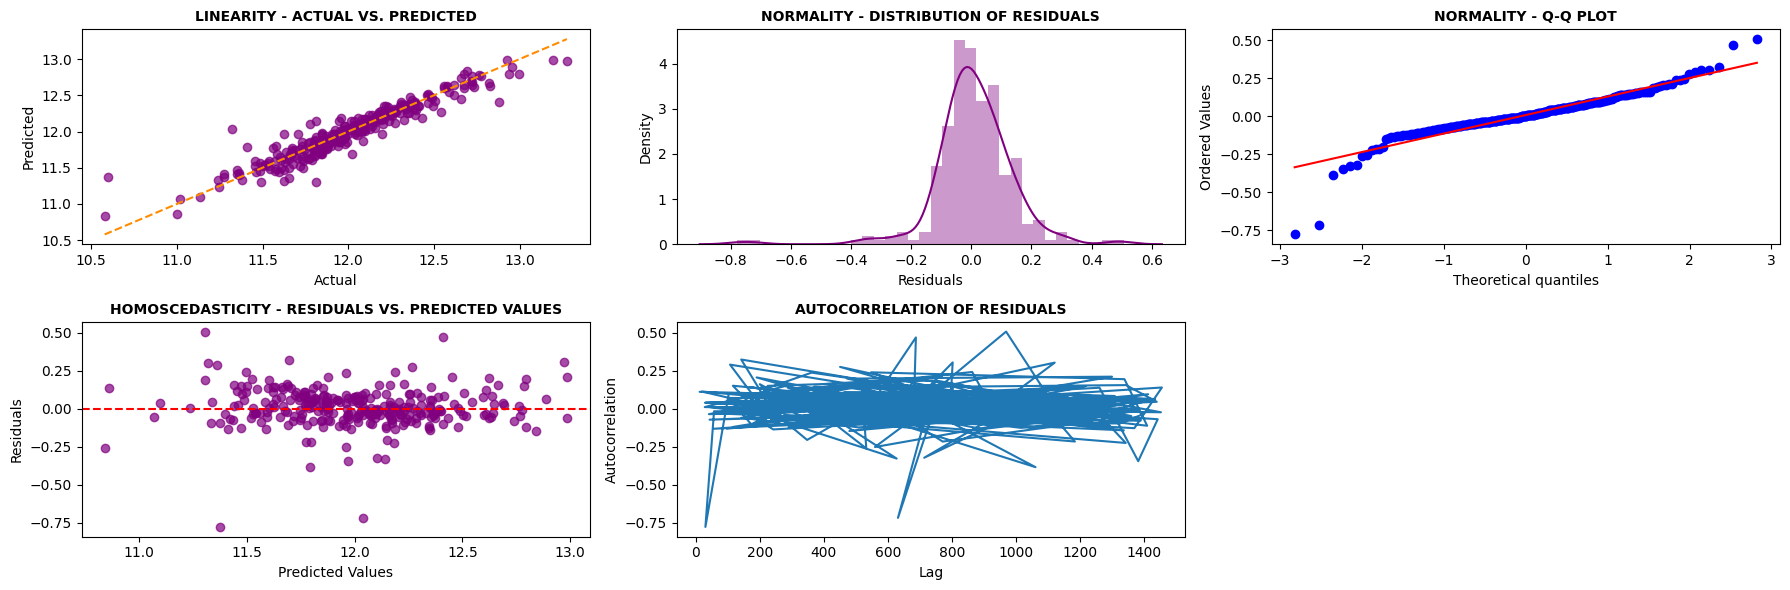

In [ ]:
# Hyperparameter tuning for Ridge Regression
pipeline = model_pipeline(Ridge())
param_grid_ridge = {'regressor__alpha': np.logspace(-4, 3, 100)}
grid_search, score = hyperparameter_tuning(pipeline, param_grid_ridge, X_train, y_train, X_test, y_test)

print('*' * 50)

# Build Ridge regression model with the best parameters found during hyperparameter tuning
pipeline_ridge = model_pipeline(Ridge(alpha=grid_search.best_params_['regressor__alpha']))
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)

# Evaluate the Ridge regression model
model_evaluation(y_test, y_pred_ridge)

# Visualize assumptions for Ridge regression
assumption_plots(y_test, y_pred_ridge)


#**Comment:**

**Hyperparameter Tuning**

- Best R^2 Score: 0.8949069956042954
- Test R^2 Score: 0.8950317669859527
- Best Parameters: {'regressor__alpha': 1.48}

**Model Evaluation**

- R^2 score: 0.8944069648968815
- Mean Squared Error (MSE): 0.01676824000762919
- Root Mean Squared Error (RMSE): 0.12949223917914612

#**Section 4.8 : Lasso Regression Model**

Best R^2 Score: 0.8981184327502936
Test R^2 Score: 0.8966988553979335
Best Parameters: {'regressor__alpha': 0.0005994842503189409}
**************************************************
R^2 score: 0.8966988553979335
Mean Squared Error (MSE): 0.01640428636281432
Root Mean Squared Error (RMSE): 0.12807921909042982


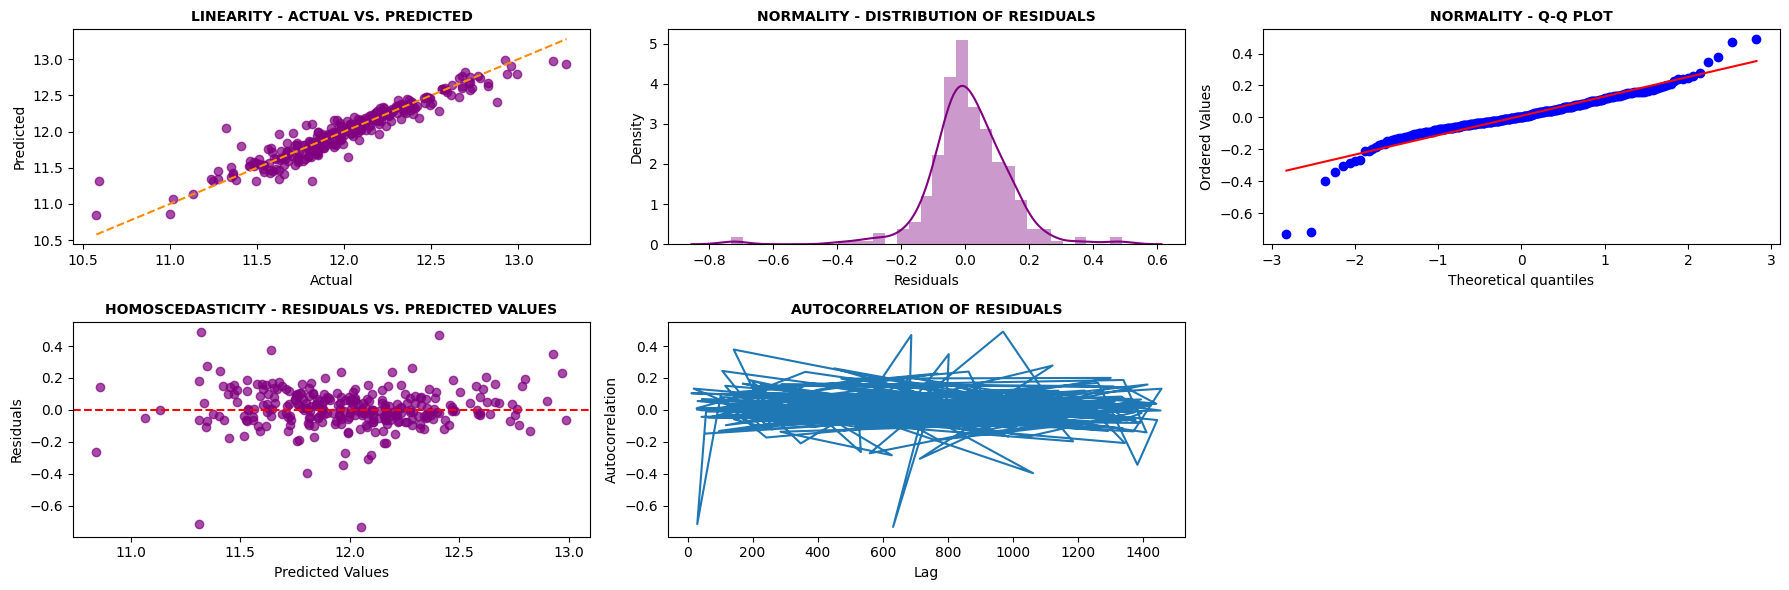

In [ ]:
# Hyperparameter tuning for Lasso Regression
pipeline = model_pipeline(Lasso())
param_grid_lasso = {'regressor__alpha': np.logspace(-4, 3, 100)}
grid_search, score = hyperparameter_tuning(pipeline, param_grid_lasso, X_train, y_train, X_test, y_test)

print('*' * 50)

# Build Lasso regression model with the best parameters found during hyperparameter tuning
pipeline_lasso = model_pipeline(Lasso(alpha=grid_search.best_params_['regressor__alpha']))
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)

# Evaluate the Lasso regression model
model_evaluation(y_test, y_pred_lasso)

# Visualize assumptions for Lasso regression
assumption_plots(y_test, y_pred_lasso)


#**Comment:**

**Hyperparameter Tuning**
- Best R^2 Score: 0.8981184327502936
- Test R^2 Score: 0.8966988553979335
- Best Parameters: {'regressor__alpha': 0.0005994842503189409}

**Model Evaluation**

- R^2 score: 0.8966988553979335
- Mean Squared Error (MSE): 0.01640428636281432
- Root Mean Squared Error (RMSE): 0.12807921909042982

#**Section 4.8 : Final Model**
- Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [ ]:
# Create a DataFrame with index as column names of X_test
model_coefficients = pd.DataFrame(index=X_test.columns)

# Add the columns for Ridge and Lasso coefficients
model_coefficients['Ridge (alpha=1.48)'] = pipeline_ridge.named_steps['regressor'].coef_[:len(X_test.columns)]
model_coefficients['Lasso (alpha=0.0006)'] = pipeline_lasso.named_steps['regressor'].coef_[:len(X_test.columns)]

# Display the DataFrame
pd.set_option('display.max_rows', None)
model_coefficients.sort_values(by='Lasso (alpha=0.0006)', ascending=False).head(5)


,Ridge (alpha=1.48),Lasso (alpha=0.0006)
2ndFlrSF,0.480840,0.591979
OverallCond,0.451306,0.501329
BsmtFullBath,0.347978,0.407713
YearBuilt,0.182533,0.175503
LotShape,0.135132,0.128970


#**Section 4.9 : Summary**

- First the housing data is read and analyzed dividing the features into numerical and categorical types.

- SalePrice is the target column here.

- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.

- New features are extracted, redundant features dropped and categorical features are encoded accordingly.

- Then the data in split into train and test data and feature scaling is performed.

- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.


**Based on the provided results:**

- **Ridge Regression:**

  - Best R² Score: 0.8949
  - Test R² Score: 0.8950
  - Best Alpha: 2.0
  - R² Score on Test Data: 0.8944
  - Mean Squared Error (MSE): 0.0168
  - Root Mean Squared Error (RMSE): 0.1295

- **Lasso Regression:**

  - Best R² Score: 0.8981
  - Test R² Score: 0.8967
  - Best Alpha: 0.0006
  - R² Score on Test Data: 0.8967
  - Mean Squared Error (MSE): 0.0164
  - Root Mean Squared Error (RMSE): 0.1281

- Both Ridge and Lasso regression models perform well on the test data, with R² scores close to 0.895 and 0.897 respectively.

- Lasso regression achieves a slightly higher R² score and lower RMSE compared to Ridge regression, indicating slightly better performance.

- The best alpha value for Ridge regression is 1.49, indicating moderate regularization, while for Lasso regression, the best alpha is 0.0006, suggesting very weak regularization.

- Lasso regression achieves better performance with a much smaller alpha value, indicating that it relies more on feature selection and less on regularization compared to Ridge regression.

#**Q&A**

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Ans:**
- The best alpha value for Ridge regression is 1.49, indicating moderate regularization, while for Lasso regression, the best alpha is 0.0006, suggesting very weak regularization."
- After changing the value of Ridge regression's alpha, the coefficient values are increasing, potentially leading to overfitting. Similarly, increasing the alpha value of Lasso regression results in more features having a coefficient of zero, which means they are not given weight in the calculation.
- The most important predictor variables in Lasso regression's top five are OverallCond, BsmtFullBath, YearBuilt, and LotShape.

**Ridge (alpha=1.48):**

- 2ndFlrSF (Coefficient: 0.480840)
- OverallCond (Coefficient: 0.451306)
- BsmtFullBath (Coefficient: 0.347978)
- YearBuilt (Coefficient: 0.182533)
- BsmtFinType2 (Coefficient: 	0.179324)


**Lasso (alpha=0.0006):**

- 2ndFlrSF (Coefficient: 0.591979)
- OverallCond (Coefficient: 0.501329)
- BsmtFullBath (Coefficient: 0.407713)
- YearBuilt (Coefficient: 0.175503)
- LotShape (Coefficient: 0.128970)

In [ ]:
# Model Building
ridge_model = model_pipeline(Ridge(alpha=1.48))
ridge_model.fit(X_train, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("Model Evaluation : Ridge Regression, alpha=1.48")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=1.48
R2 score (train) :  0.9137
R2 score (test) :  0.895
RMSE (train) :  0.1174
RMSE (test) :  0.1291


In [ ]:
lasso_model = model_pipeline(Lasso(alpha= 0.0006))
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print("Model Evaluation : Lasso Regression, alpha=0.006")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.006
R2 score (train) :  0.9106
R2 score (test) :  0.8967
RMSE (train) :  0.1195
RMSE (test) :  0.1281


In [ ]:
model_coefficients.sort_values(by='Lasso (alpha=0.0006)', ascending=False).head(5)

,Ridge (alpha=1.48),Lasso (alpha=0.0006)
2ndFlrSF,0.480840,0.591979
OverallCond,0.451306,0.501329
BsmtFullBath,0.347978,0.407713
YearBuilt,0.182533,0.175503
LotShape,0.135132,0.128970


**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Ans:**

Based on these results, I would choose Lasso Regression for the following reasons:

- Higher Test R² Score: Lasso Regression has a slightly higher Test R² Score (0.8967) compared to Ridge Regression (0.8950), indicating better predictive performance on unseen data.
- Lower RMSE: Lasso Regression also has a slightly lower Root Mean Squared Error (RMSE) of 0.1281 compared to Ridge Regression's RMSE of 0.1295, indicating better accuracy in predicting the target variable.
- Better Feature Selection: Lasso Regression tends to perform feature selection by shrinking some coefficients to exactly zero. This means it may provide a simpler and more interpretable model by automatically selecting the most important features while still maintaining good predictive performance.


**Model Evaluation : Ridge Regression, alpha=1.48**
- R2 score (train) :  0.9142
- R2 score (test) :  0.8948
- RMSE (train) :  0.117
- RMSE (test) :  0.1292


**Model Evaluation : Lasso Regression, alpha=0.006**
- R2 score (train) :  0.9106
- R2 score (test) :  0.8967
- RMSE (train) :  0.1195
- RMSE (test) :  0.1281





**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Ans:**

**Ridge (alpha=1.48):**

- 2ndFlrSF (Coefficient: 0.480840)
- OverallCond (Coefficient: 0.451306)
- BsmtFullBath (Coefficient: 0.347978)
- YearBuilt (Coefficient: 0.182533)
- BsmtFinType2 (Coefficient: 0.179324)

**Lasso (alpha=0.0006):**

- 2ndFlrSF (Coefficient: 0.591979)
- OverallCond (Coefficient: 0.501329)
- BsmtFullBath (Coefficient: 0.407713)
- YearBuilt (Coefficient: 0.175503)
- LotShape (Coefficient: 0.128970)

In [ ]:
model_coefficients[['Ridge (alpha=1.48)']].sort_values(by='Ridge (alpha=1.48)', ascending=False).head(5)

,Ridge (alpha=1.48)
2ndFlrSF,0.480840
OverallCond,0.451306
BsmtFullBath,0.347978
YearBuilt,0.182533
BsmtFinType2,0.179324


In [ ]:
model_coefficients[['Lasso (alpha=0.0006)']].sort_values(by='Lasso (alpha=0.0006)', ascending=False).head(5)

,Lasso (alpha=0.0006)
2ndFlrSF,0.591979
OverallCond,0.501329
BsmtFullBath,0.407713
YearBuilt,0.175503
LotShape,0.128970


**Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

**Ans:**

- **Cross-Validation**: Use techniques like k-fold cross-validation to assess the model's performance across multiple subsets of the data. This helps in evaluating how well the model generalizes to unseen data.

- **Train-Test Split**: Split the dataset into training and testing sets. Train the model on the training set and evaluate its performance on the testing set. This helps to simulate how well the model performs on new, unseen data.

- **Feature Selection and Regularization:** Employ techniques like L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting and reduce the impact of irrelevant features. Feature selection methods can also be used to choose the most relevant features for the model.

- **Hyperparameter Tuning:** Fine-tune the model's hyperparameters using techniques like grid search or random search. This ensures that the model is optimized for performance while avoiding overfitting.

- **Ensemble Methods:** Utilize ensemble methods like bagging, boosting, or stacking to combine the predictions of multiple models. Ensemble methods often lead to more robust and accurate models by leveraging the strengths of individual models.

- **Out-of-Sample Testing**: Validate the model's performance on completely unseen data, separate from both the training and testing sets. This provides a more stringent test of the model's generalization capability.